# Enterprise Data Science Bootcamp Project
### Enterprise Data Science & Analytics 2025

---

### Team Members:
- **Daniel Almeida** (20241154)
- **Gonçalo Dias** (20240819)
- **Miguel Almeida** (20241151)

In [1]:
%run ../utils/configuration.ipynb

In [2]:
import sys
import polars as pl

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [4]:
try:
    df = pl.read_parquet(f'{silver_path}/merge_file.parquet')
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


<a class="anchor" id="1st-bullet">
# 1. Data Collection and Initial Processing & Exploratory Data Analysis
</a>

In [5]:
df.shape

(7043, 50)

In [6]:
#df.index

In [7]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64


In [8]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [9]:
df.describe()

statistic,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,f64
"""count""","""7043""","""7043""",7043.0,7043.0,"""7043""","""7043""",7043.0,"""7043""","""7043""","""7043""",7043.0,"""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,"""7043""",7043.0,0.0,7043.0,7043.0,7043.0,"""7043""",7043.0,"""7043""",7043.0,7043.0,7043.0,"""7043""",7043.0,"""7043""","""7043""",7043.0,7043.0,7043.0,"""7043""","""7043""",7043.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,7043.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,1.951867,32.386767,null,null,22.958954,null,null,null,20.515405,null,null,null,null,null,null,null,null,null,null,null,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,null,46.509726,null,0.162147,0.483033,0.468692,null,93486.070567,null,36.197455,-119.756684,1.0,null,3.244924,null,null,0.26537,58.50504,4400.295755,null,null,22139.603294
"""std""",null,null,3.001199,24.542061,null,null,15.448113,null,null,null,20.41894,null,null,null,null,null,null,null,null,null,null,null,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,null,16.750352,null,0.368612,0.499748,0.962802,null,1856.767505,null,2.468929,2.154425,0.0,null,1.201657,null,null,0.441561,21.170031,1183.057152,null,null,21152.392837
"""min""","""0002-ORFBO""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""No""","""Cable""",0.0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-Month""","""No""","""Bank Withdrawal""",18.25,18.8,0.0,0.0,0.0,21.36,"""Female""",19.0,null,0.0,0.0,0.0,"""Acampo""",90001.0,"""32.555828, -117.040073""",32.555828,-124.301372,1.0,"""Q3""",1.0,"""Churned""","""No""",0.0,5.0,2003.0,"""Attitude""","""Attitude of service provider""",11.0
"""25%""",null,null,0.0,9.0,null,null,9.21,null,null,null,3.0,null,null,null,null,null,null,null,null,null,null,null,35.5,400.3,0.0,0.0,70.59,605.75,null,32.0,null,0.0,0.0,0.0,null,92101.0,null,33.990646,-121.78809,1.0,null,3.0,null,null,0.0,40.0,3469.0,null,null,2344.0
"""50%""",null,null,0.0,29.0,null,null,22.89,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,70.35,1394.55,0.0,0.0,401.44,2108.64,null,46.0,null,0.0,0.0,0.0,null,93518.0,null,36.205465,-119.595293,1.0,null,3.0,null,null,0.0,61.0,4527.0,null,null,17554.0
"""75%""",null,null,3.0,55.0,null,null,36.4,null,null,null,27.0,null,null,null,null,null,null,null,null,null,null,null,89.85,3789.2,0.0,0.0,1191.5,4801.93,null,60.0,null,0.0,1.0,0.0,null,95329.0,null,38.161321,-117.969795,1.0,null,4.0,null,null,1.0,76.0,5381.0,null,null,36125.0
"""max""","""9995-HOTOH""","""Yes""",11.0,72.0,"""Offer E""","""Yes""",49.99,"""Yes""","""Yes""","""None""",85.0,"""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Mailed Check""",

In [10]:
df.schema

Schema([('customer_id', String),
        ('referred_a_friend', String),
        ('number_of_referrals', Int64),
        ('tenure_in_months', Int64),
        ('offer', String),
        ('phone_service', String),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', String),
        ('internet_service', String),
        ('internet_type', String),
        ('avg_monthly_gb_download', Int64),
        ('online_security', String),
        ('online_backup', String),
        ('device_protection_plan', String),
        ('premium_tech_support', String),
        ('streaming_tv', String),
        ('streaming_movies', String),
        ('streaming_music', String),
        ('unlimited_data', String),
        ('contract', String),
        ('paperless_billing', String),
        ('payment_method', String),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_lo

In [11]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df.select(pl.all().n_unique())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
7043,2,12,72,6,2,3584,2,2,4,50,2,2,2,2,2,2,2,2,3,2,3,1585,6540,500,16,6110,6996,2,62,1,2,2,10,1106,1626,1679,1626,1625,1,1,5,3,2,2,81,3438,6,21,1569


In [13]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (7_043, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 8785-EPNCG  │
│ 2282-YGNOR  │
│ 4585-HETAI  │
│ 6982-SSHFK  │
│ 3810-DVDQQ  │
│ …           │
│ 6685-GBWJZ  │
│ 2882-WDTBA  │
│ 2530-ENDWQ  │
│ 9129-UXERG  │
│ 7544-ZVIKX  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 9                   │
│ 6                   │
│ 0                   │
│ 3                   │
│ 4                   │
│ …                   │
│ 7                   │
│ 8                   │
│ 2                   │
│ 5                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_mo

In [14]:
df.select(pl.col(pl.NUMERIC_DTYPES)).describe()

C:\Users\gjddi\AppData\Local\Temp\ipykernel_20012\3086008548.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df.select(pl.col(pl.NUMERIC_DTYPES)).describe()


statistic,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,0.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,46.509726,null,0.162147,0.483033,0.468692,93486.070567,36.197455,-119.756684,1.0,3.244924,0.26537,58.50504,4400.295755,22139.603294
"""std""",3.001199,24.542061,15.448113,20.41894,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,16.750352,null,0.368612,0.499748,0.962802,1856.767505,2.468929,2.154425,0.0,1.201657,0.441561,21.170031,1183.057152,21152.392837
"""min""",0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,19.0,null,0.0,0.0,0.0,90001.0,32.555828,-124.301372,1.0,1.0,0.0,5.0,2003.0,11.0
"""25%""",0.0,9.0,9.21,3.0,35.5,400.3,0.0,0.0,70.59,605.75,32.0,null,0.0,0.0,0.0,92101.0,33.990646,-121.78809,1.0,3.0,0.0,40.0,3469.0,2344.0
"""50%""",0.0,29.0,22.89,17.0,70.35,1394.55,0.0,0.0,401.44,2108.64,46.0,null,0.0,0.0,0.0,93518.0,36.205465,-119.595293,1.0,3.0,0.0,61.0,4527.0,17554.0
"""75%""",3.0,55.0,36.4,27.0,89.85,3789.2,0.0,0.0,1191.5,4801.93,60.0,null,0.0,1.0,0.0,95329.0,38.161321,-117.969795,1.0,4.0,1.0,76.0,5381.0,36125.0
"""max""",11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11979.34,80.0,null,1.0,1.0,9.0,96150.0,41.962127,-114.192901,1.0,5.0,1.0,96.0,6500.0,105285.0


In [15]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\gjddi\AppData\Local\Temp\ipykernel_20012\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


In [16]:
df_numerical_variables.columns

['number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'count',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

In [17]:
df_numerical_variables = df_numerical_variables.drop(['under_30', 'count'])


In [18]:
df_numerical_variables

number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,satisfaction_score,churn_value,churn_score,cltv,population
i64,i64,f64,i64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64
0,1,0.0,8,39.65,39.65,0.0,20,0.0,59.65,78,1,0,0,90022,34.02381,-118.156582,3,1,91,5433,68701
1,8,48.85,17,80.65,633.3,0.0,0,390.8,1024.1,74,1,1,1,90063,34.044271,-118.185237,3,1,69,5302,55668
0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,71,1,0,3,90065,34.108833,-118.229715,2,1,81,3179,47534
1,25,19.76,12,98.5,2514.5,13.43,0,494.0,2995.07,78,1,1,1,90303,33.936291,-118.332639,2,1,88,5337,27778
1,37,6.33,14,76.5,2868.15,0.0,0,234.21,3102.36,80,1,1,1,90602,33.972119,-118.020188,2,1,67,2793,26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,72,22.77,0,21.15,1419.4,19.31,0,1639.44,3039.53,30,0,0,0,92285,34.341737,-116.539416,5,0,45,5306,2182
1,24,36.05,24,84.8,1990.5,48.23,0,865.2,2807.47,38,0,1,2,92301,34.667815,-117.536183,3,0,59,2140,18980
4,72,29.66,59,103.2,7362.9,45.38,0,2135.52,9453.04,30,0,1,2,92304,34.559882,-115.637164,4,0,71,5560,42


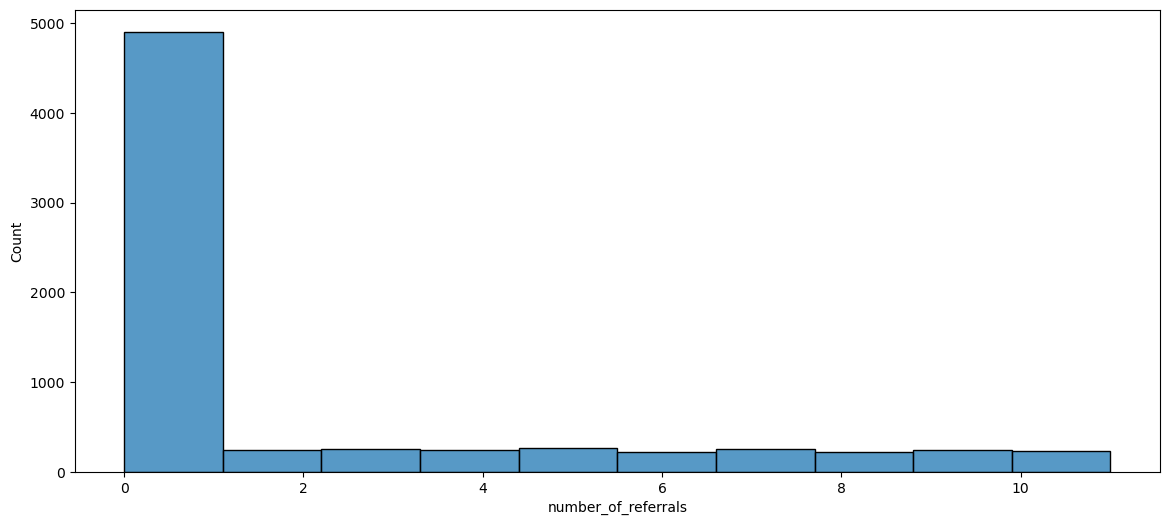

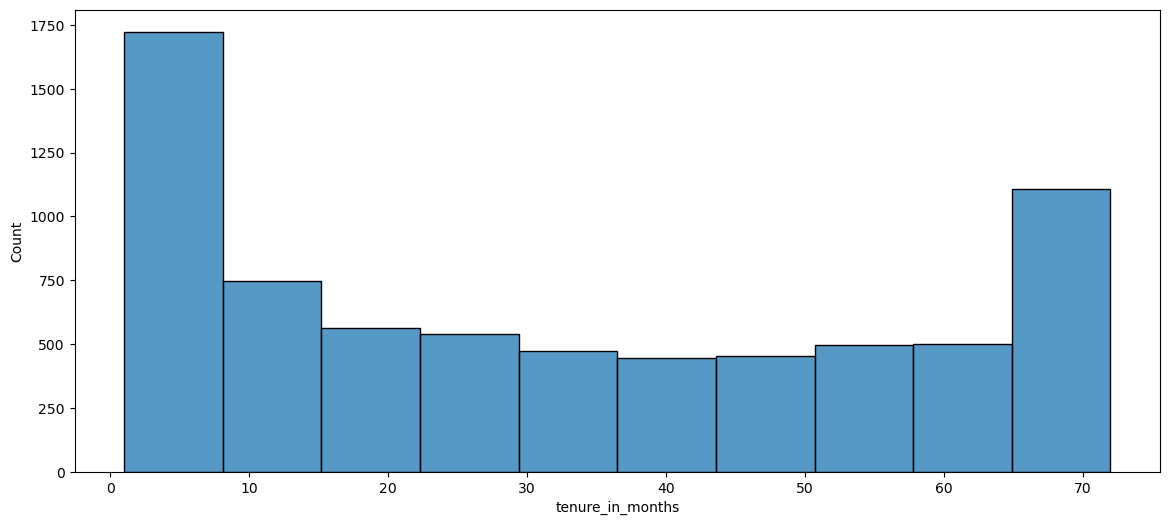

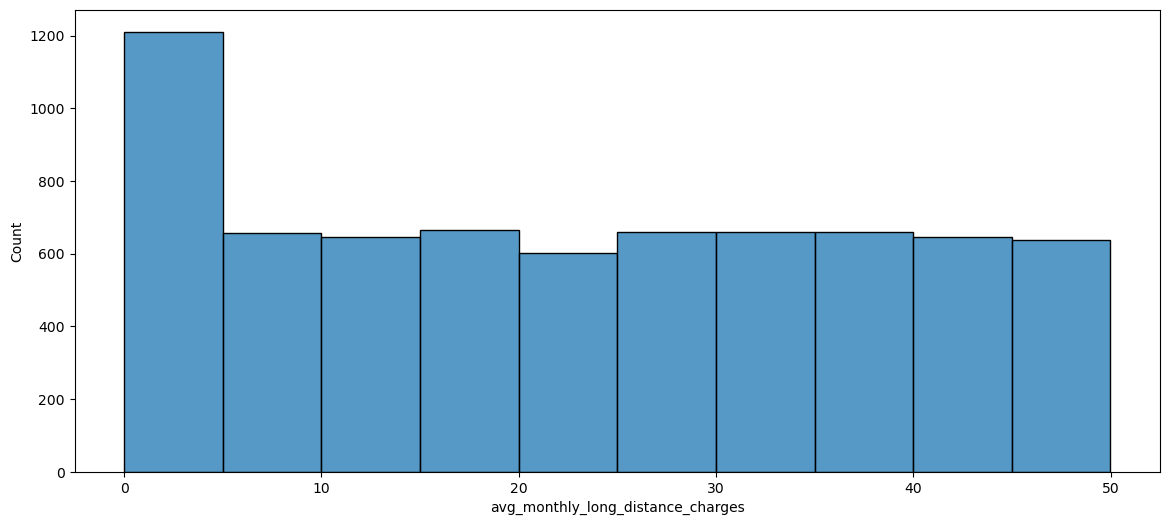

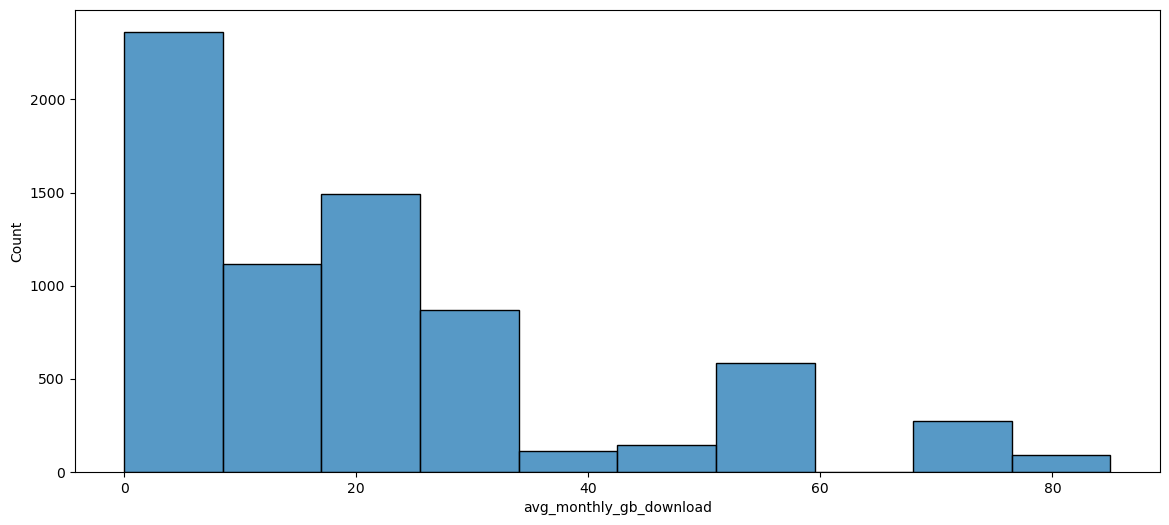

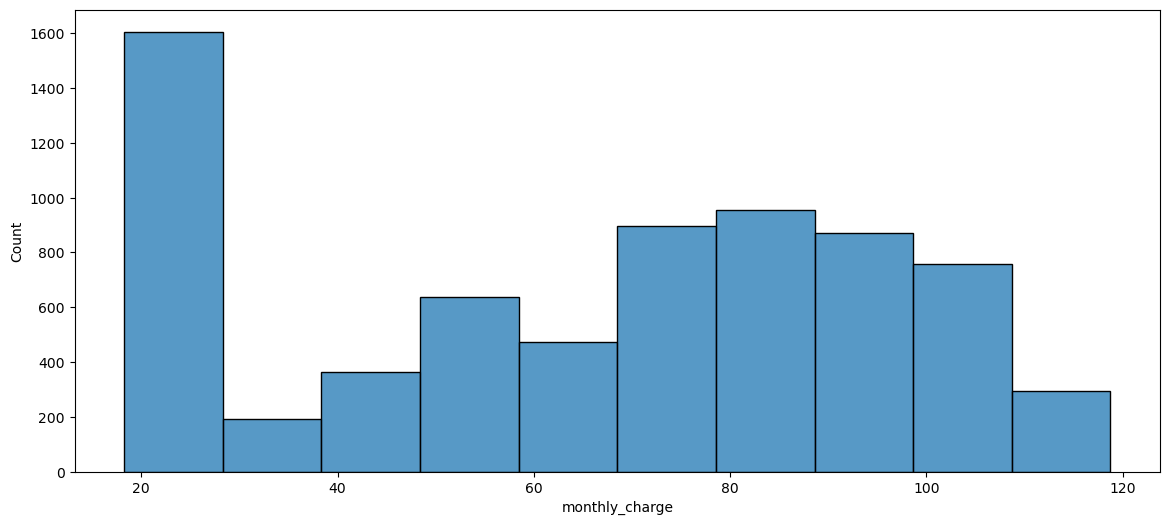

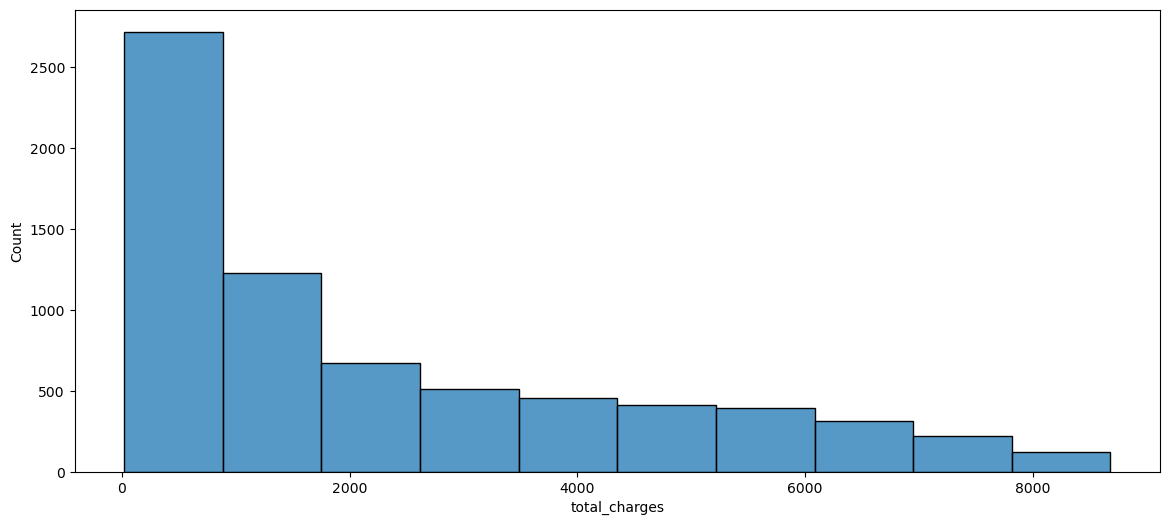

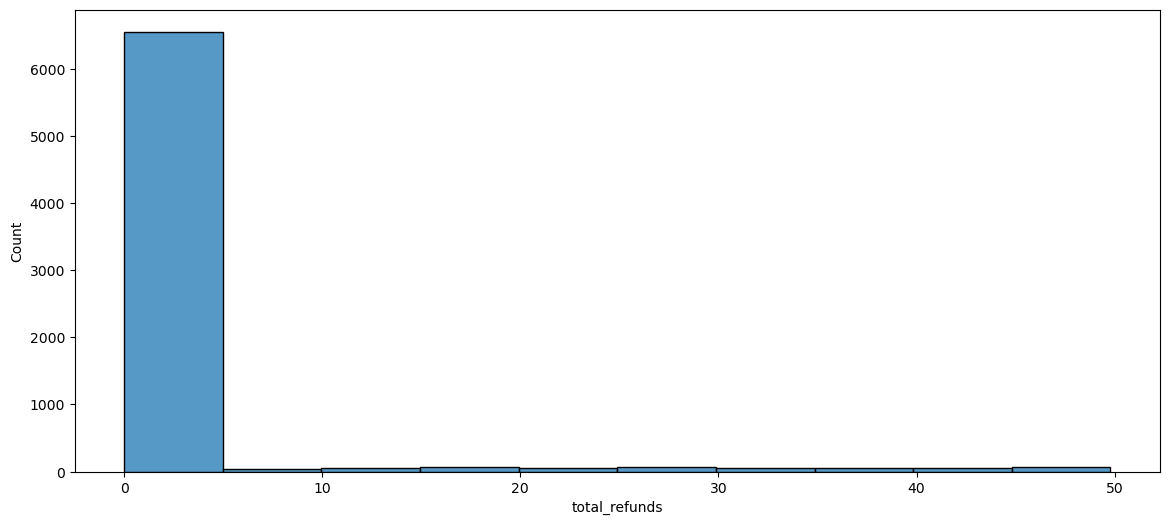

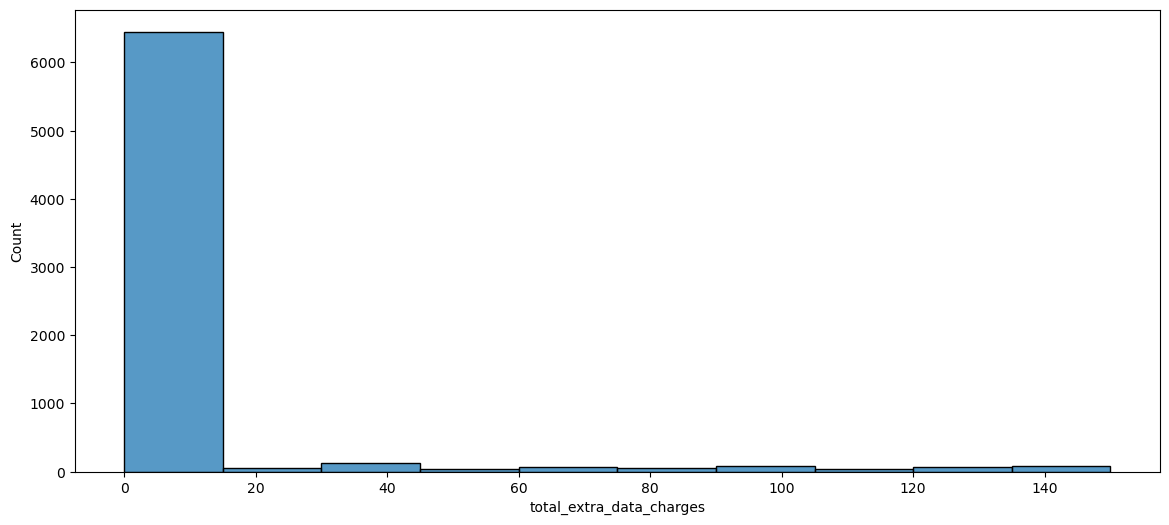

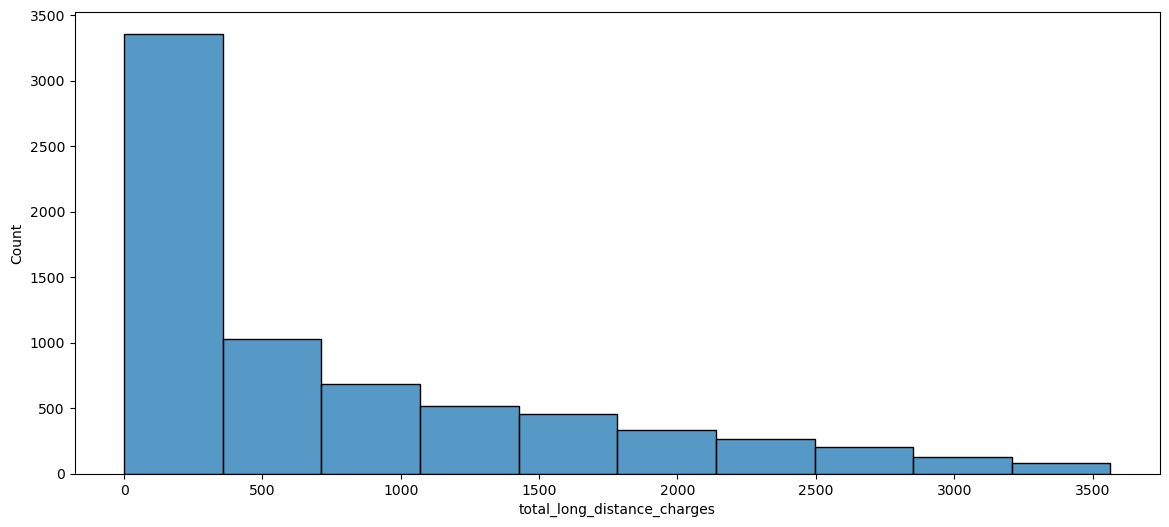

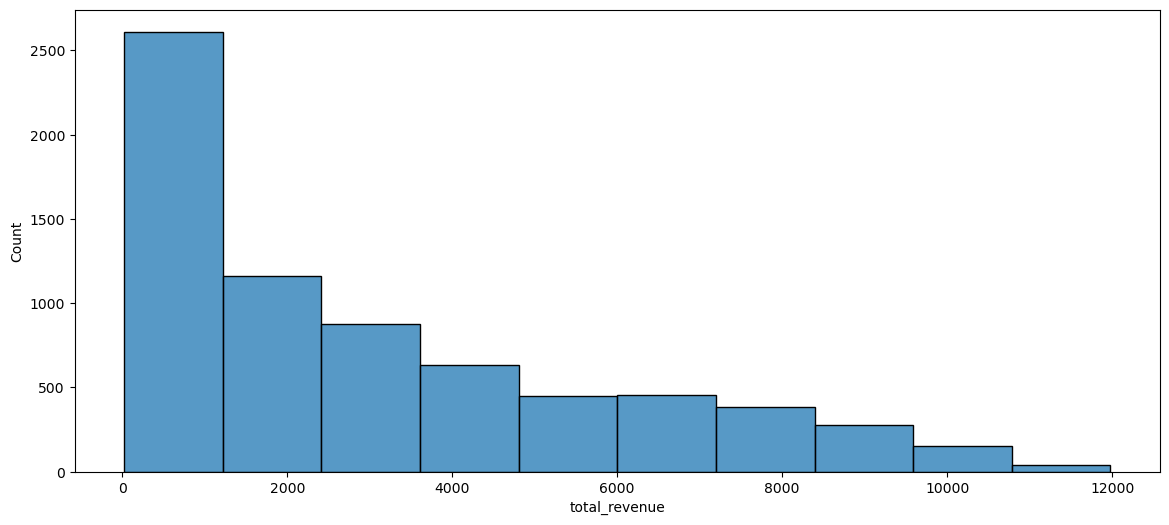

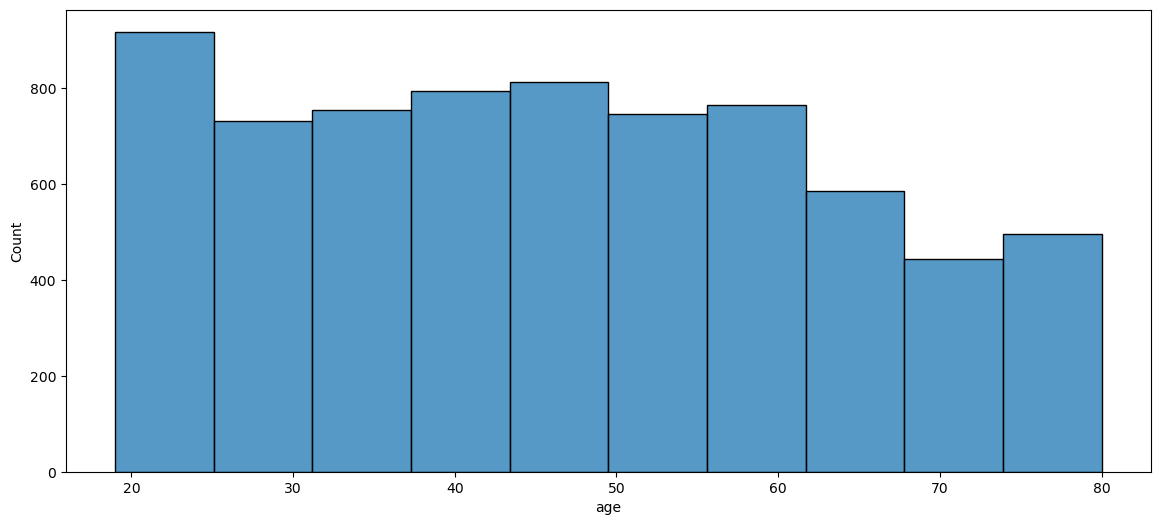

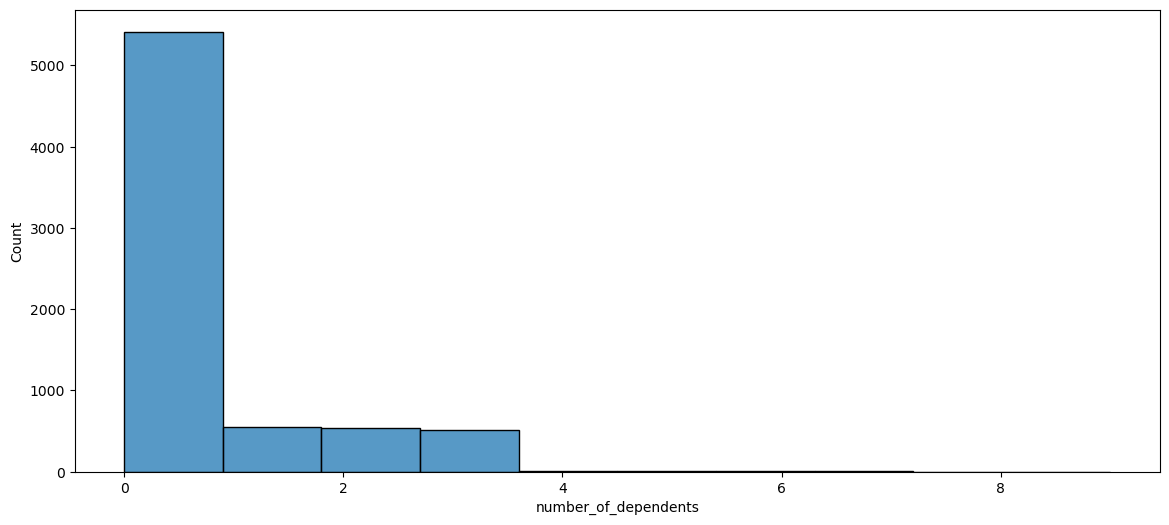

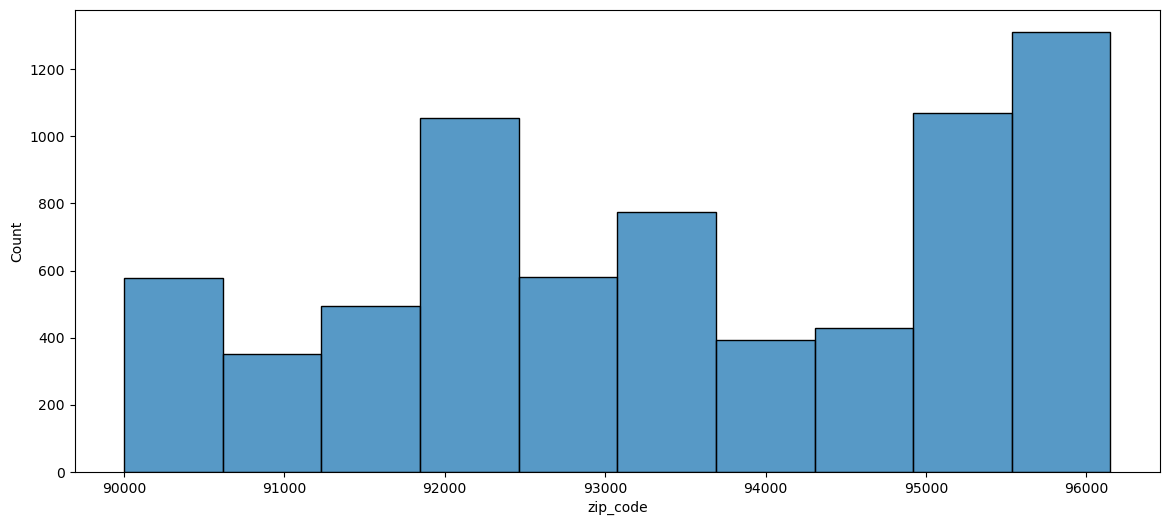

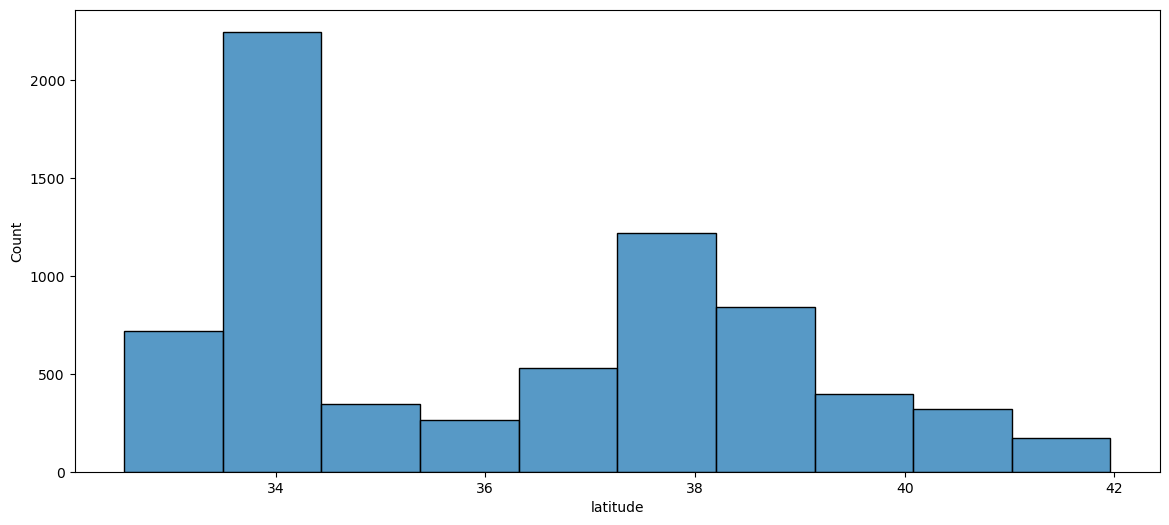

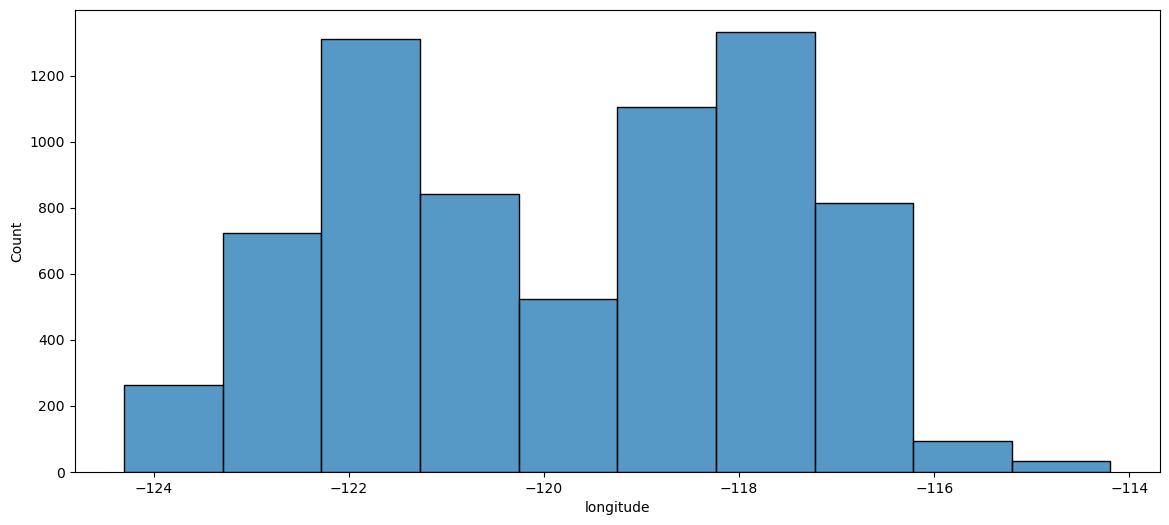

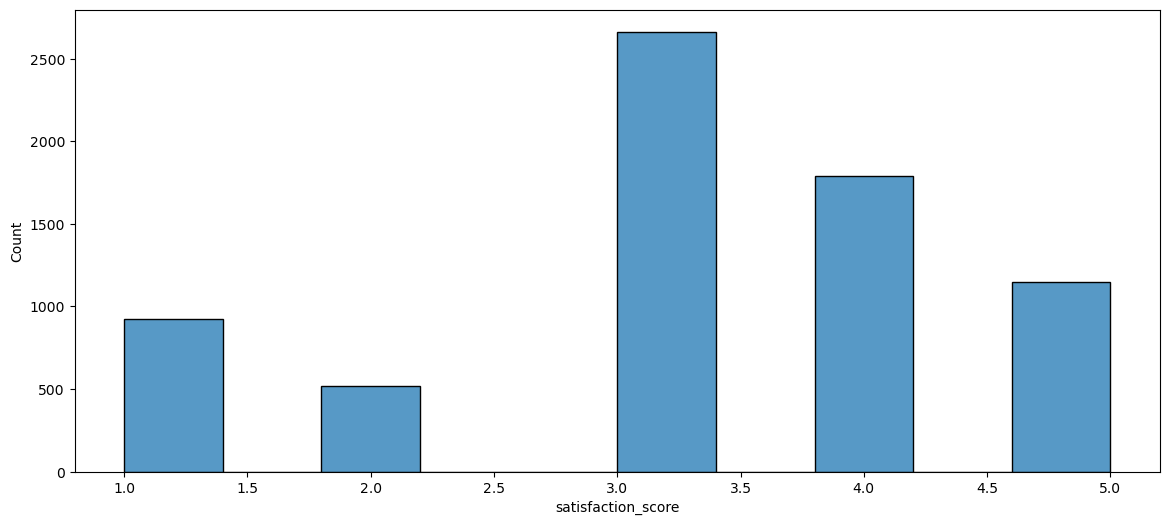

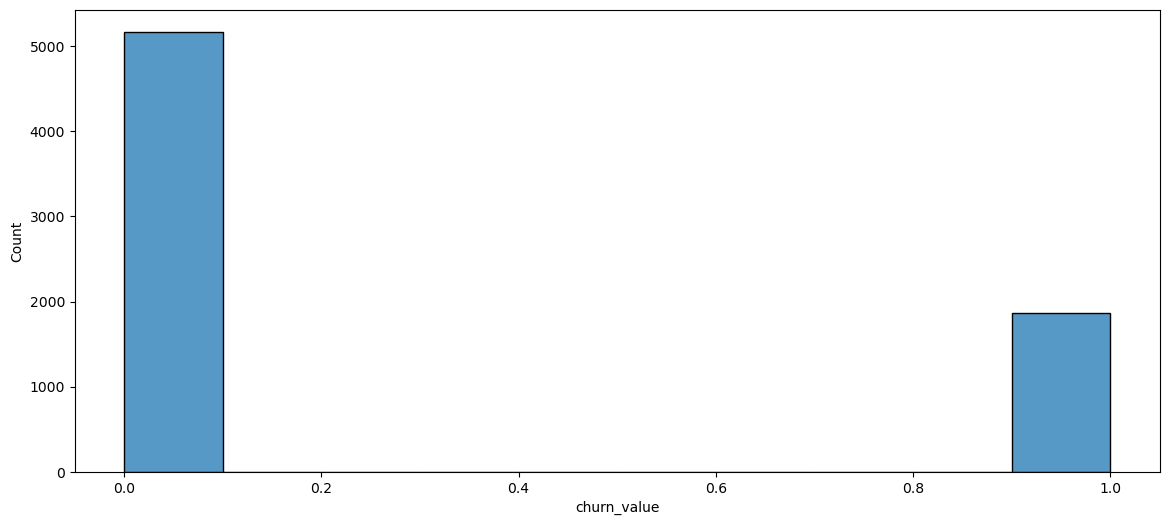

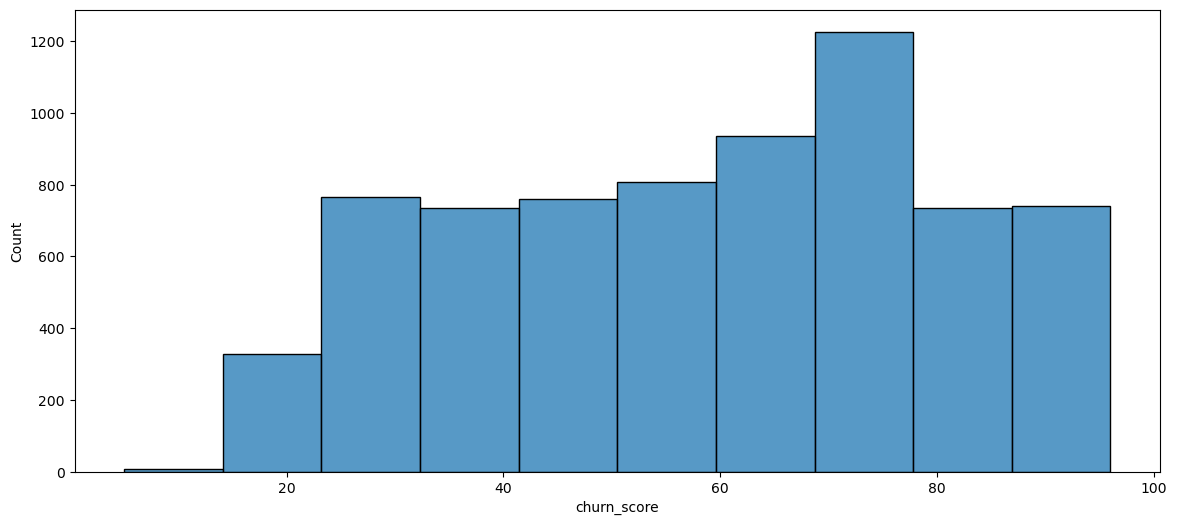

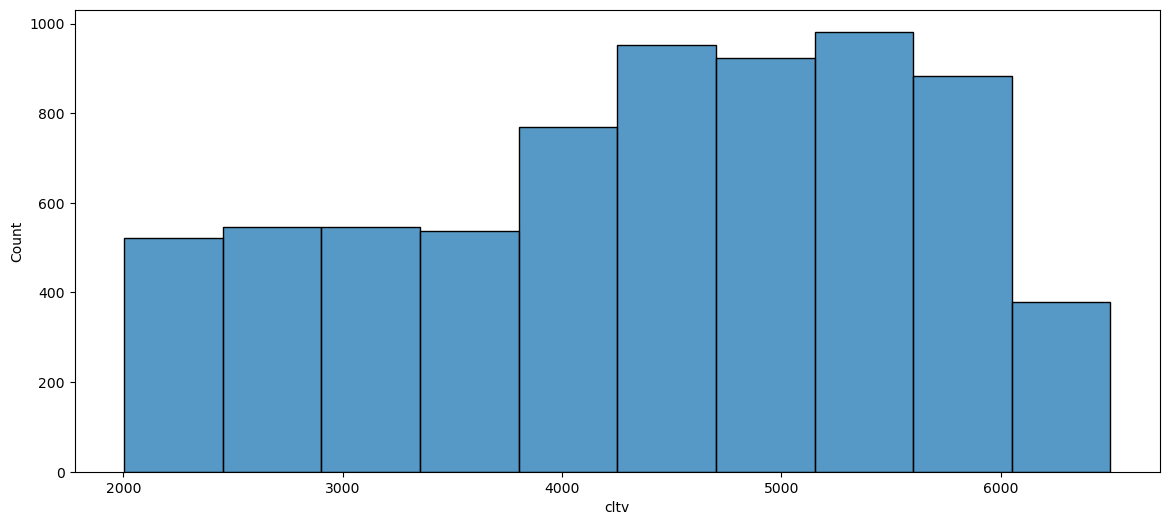

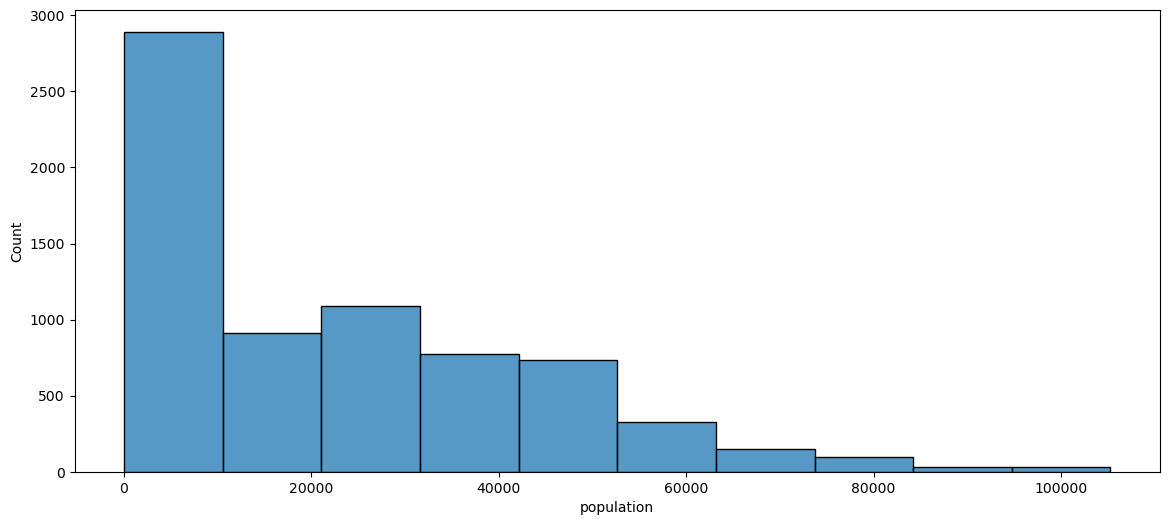

In [19]:
bivalue_columns_x = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    ,'senior_citizen'
    ,'married'
]
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



In [20]:
#"population","citv",
#df['Healthcare_Costs'] = np.log(df['Healthcare Costs'])
#df['Incidence_Rate_per_100K'] = np.log(df['Incidence Rate per 100K'])
#df['Mortality_Rate_per_100K'] = np.log(df['Mortality Rate per 100K'])
#df['Tumor_Size_(mm)'] = np.cbrt(df['Tumor Size (mm)'])

Correlation between Numerical Variables

<Axes: >

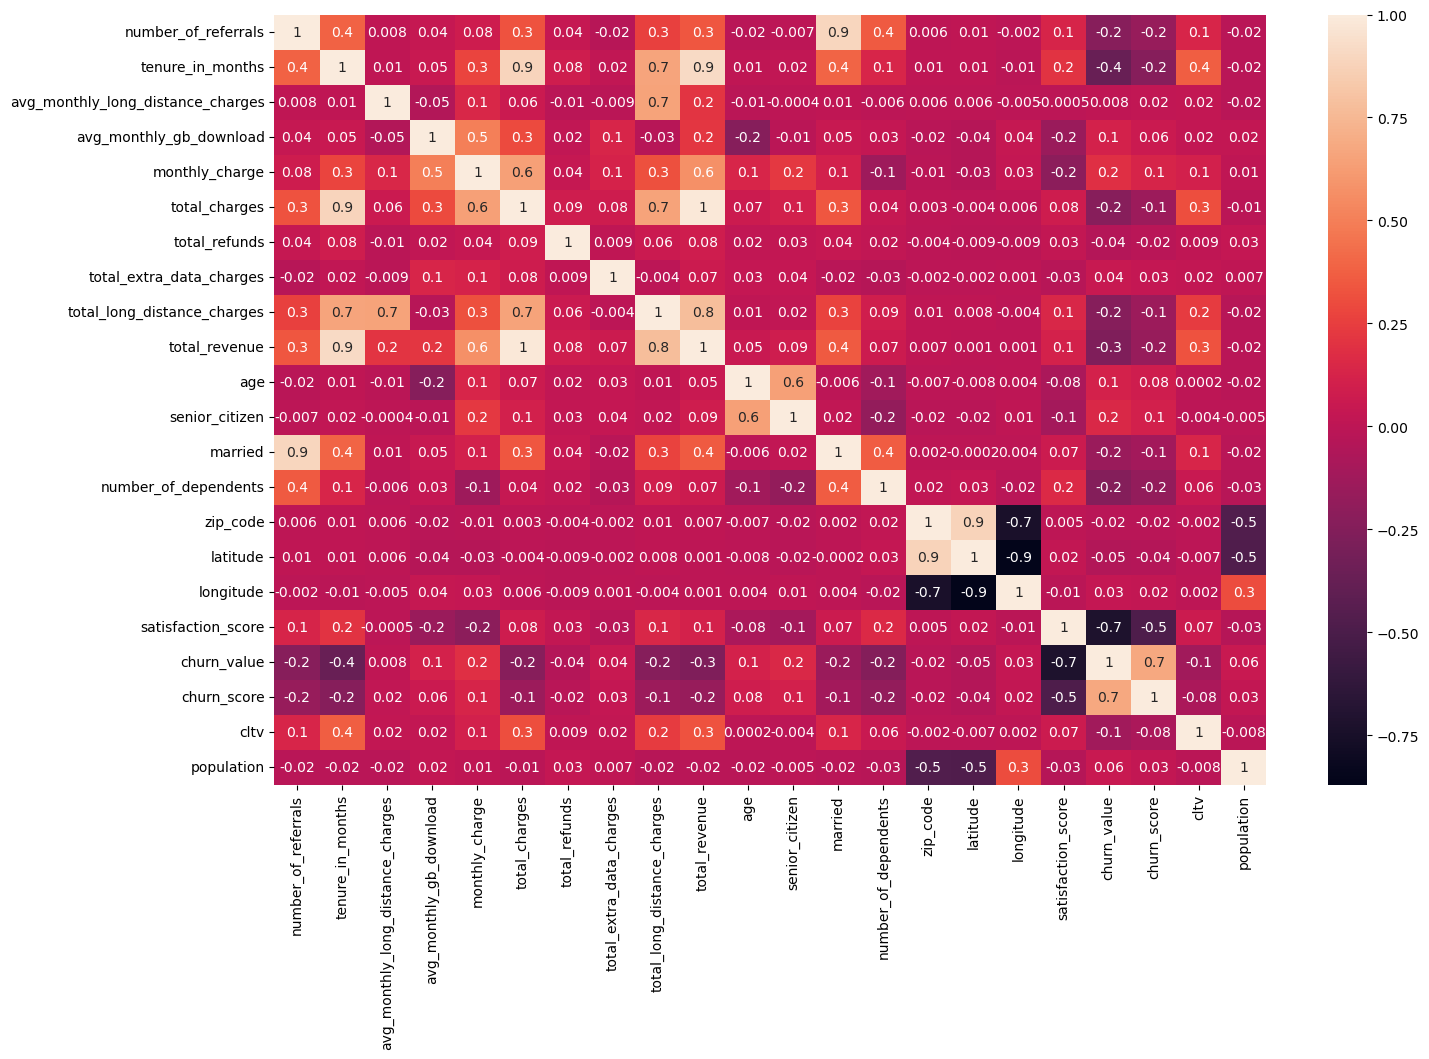

In [21]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [22]:
df_corr

,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,married,number_of_dependents,zip_code,latitude,longitude,satisfaction_score,churn_value,churn_score,cltv,population
number_of_referrals,1.000000,0.383039,0.008335,0.037487,0.079701,0.326821,0.036607,-0.024683,0.257349,0.339392,...,0.896375,0.355804,0.006078,0.010598,-0.002444,0.130206,-0.232731,-0.168326,0.131285,-0.020634
tenure_in_months,0.383039,1.000000,0.013885,0.053036,0.275789,0.889476,0.083690,0.019404,0.663367,0.912647,...,0.386613,0.134632,0.010309,0.012727,-0.012146,0.203846,-0.368708,-0.240337,0.366693,-0.018581
avg_monthly_long_distance_charges,0.008335,0.013885,1.000000,-0.048957,0.141125,0.058585,-0.013136,-0.009476,0.651340,0.209445,...,0.010713,-0.006382,0.005983,0.006439,-0.004936,-0.000516,0.008458,0.020947,0.023741,-0.016503
avg_monthly_gb_download,0.037487,0.053036,-0.048957,1.000000,0.498040,0.294928,0.017024,0.131739,-0.026340,0.216682,...,0.047477,0.029472,-0.018173,-0.035523,0.036453,-0.153656,0.110684,0.063442,0.023319,0.024157
monthly_charge,0.079701,0.275789,0.141125,0.498040,1.000000,0.638115,0.036619,0.123377,0.317069,0.569287,...,0.108463,-0.132957,-0.012353,-0.032189,0.030482,-0.209895,0.184743,0.130481,0.107944,0.010469
total_charges,0.326821,0.889476,0.058585,0.294928,0.638115,1.000000,0.087017,0.077756,0.650487,0.978366,...,0.341787,0.042288,0.003422,-0.003904,0.006205,0.077207,-0.231236,-0.145861,0.310290,-0.011741
total_refunds,0.036607,0.083690,-0.013136,0.017024,0.036619,0.087017,1.000000,0.009480,0.061110,0.082239,...,0.039839,0.018136,-0.003880,-0.008792,-0.009177,0.027109,-0.039466,-0.018883,0.008875,0.032727
total_extra_data_charges,-0.024683,0.019404,-0.009476,0.131739,0.123377,0.077756,0.009480,1.000000,-0.003973,0.067299,...,-0.017962,-0.031216,-0.002041,-0.002345,0.001230,-0.028474,0.044648,0.031024,0.024957,0.007387
total_long_distance_charges,0.257349,0.663367,0.651340,-0.026340,0.317069,0.650487,0.061110,-0.003973,1.000000,0.777501,...,0.264729,0.090927,0.009894,0.007660,-0.004343,0.145193,-0.240615,-0.139890,0.240317,-0.024888
total_revenue,0.339392,0.912647,0.209445,0.216682,0.569287,0.978366,0.082239,0.067299,0.777501,1.000000,...,0.352561,0.065317,0.006910,0.001413,0.001002,0.111418,-0.263706,-0.164526,0.323840,-0.018022


In [23]:
for col in df_numerical_variables.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 6                   │
│ 0                   │
│ 3                   │
│ 9                   │
│ 7                   │
│ …                   │
│ 1                   │
│ 5                   │
│ 2                   │
│ 8                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_months
shape: (72, 1)
┌──────────────────┐
│ tenure_in_months │
│ ---              │
│ i64              │
╞══════════════════╡
│ 21               │
│ 24               │
│ 6                │
│ 9                │
│ 18               │
│ …                │
│ 71               │
│ 68               │
│ 59               │
│ 65               │
│ 62               │
└──────────────────┘

Coluna: avg_monthly_long_distance_charges
shape: (3_584, 1)
┌─────────────────────────────────┐
│ avg_monthly_long_distance_char… │
│ ---             

In [24]:
bivalue_columns = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    #,'senior_citizen'
    #,'married'
]

C:\Users\gjddi\AppData\Local\Temp\ipykernel_20012\1510456290.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


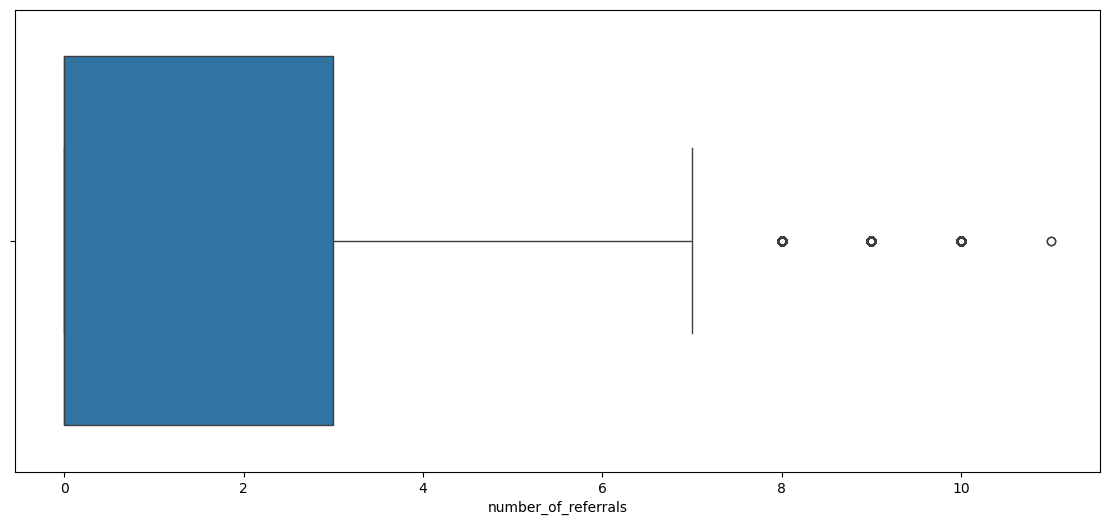

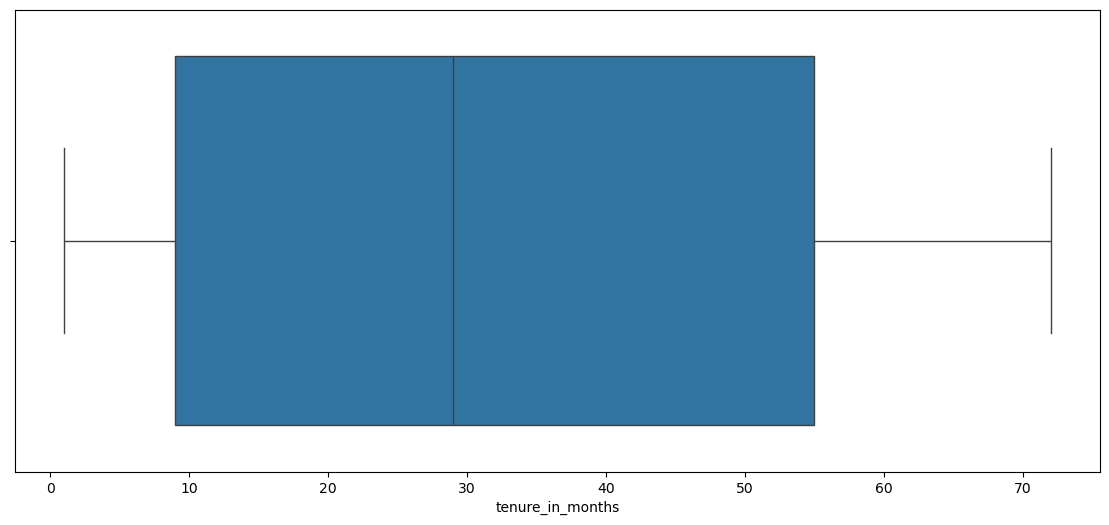

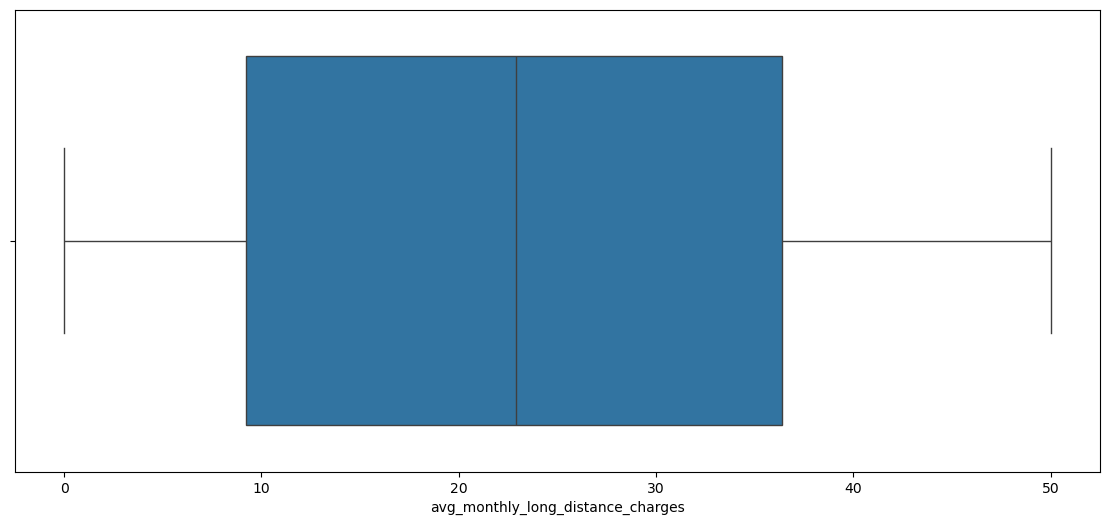

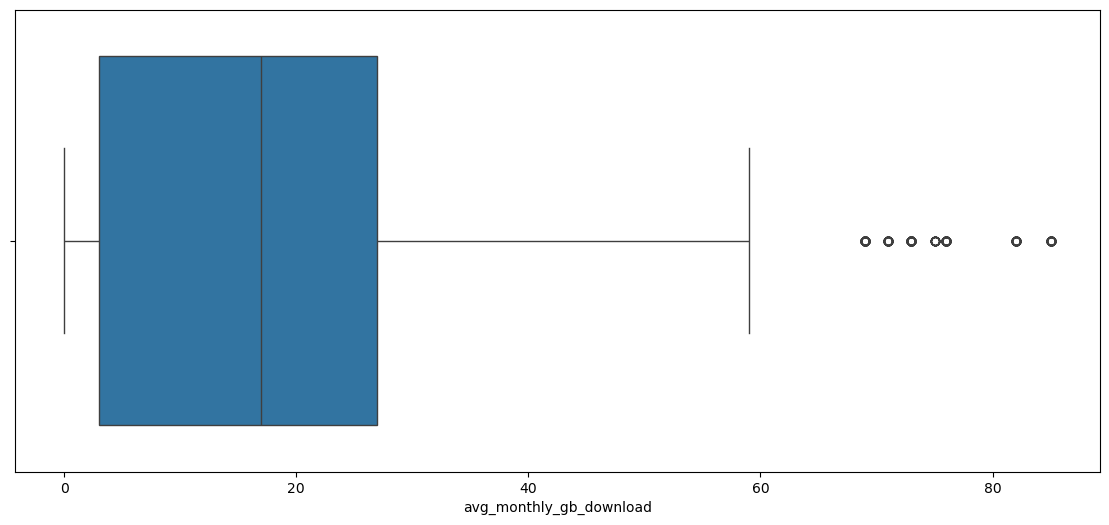

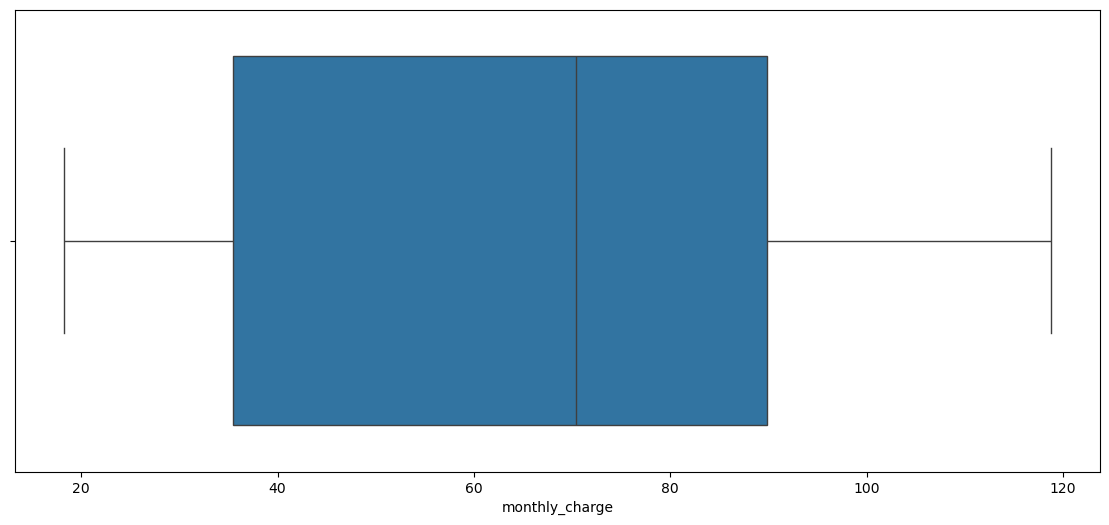

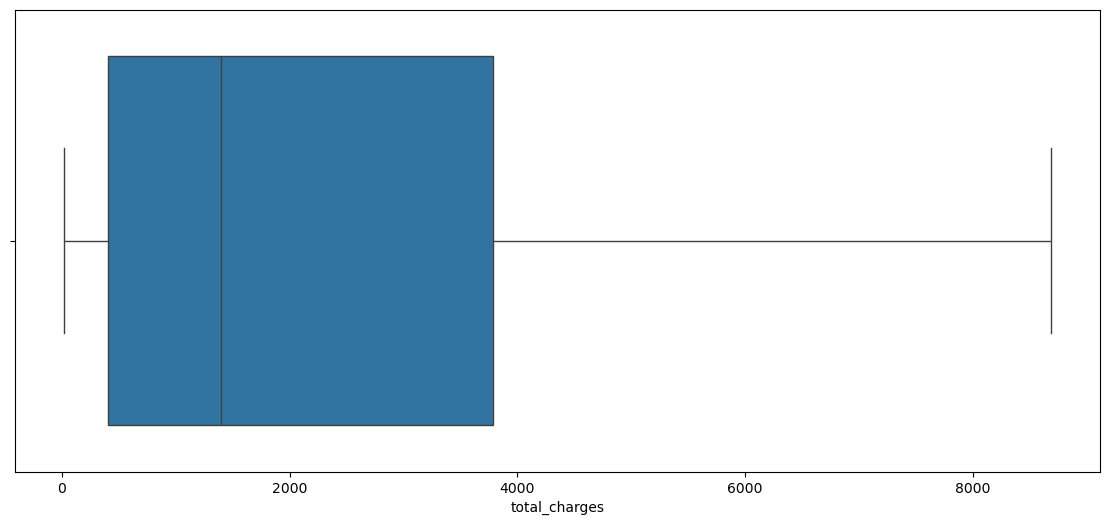

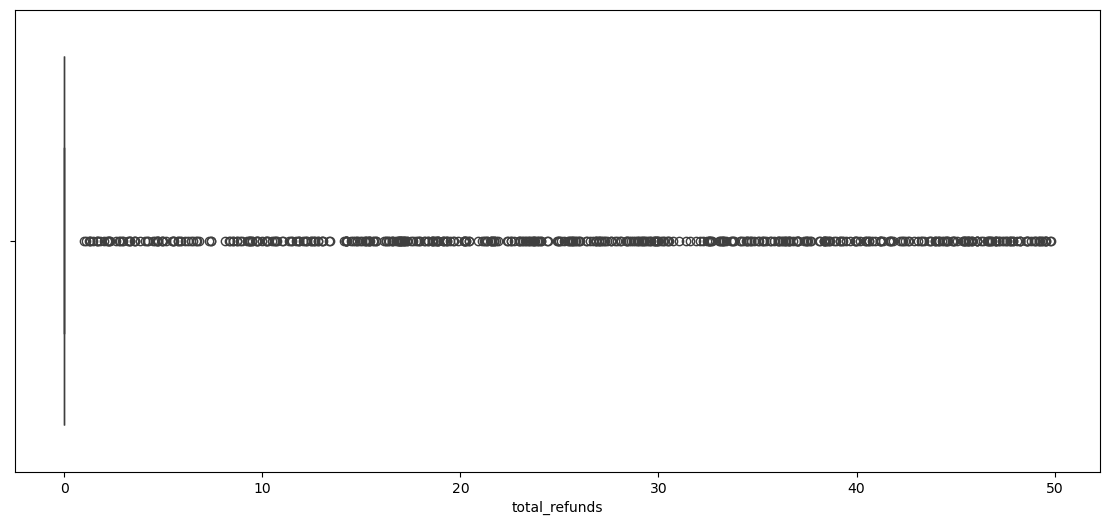

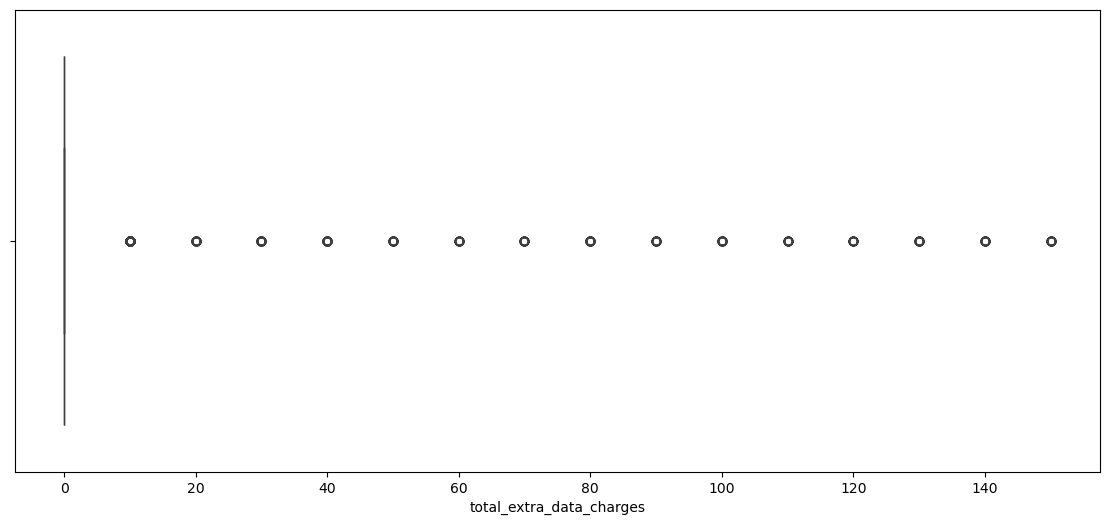

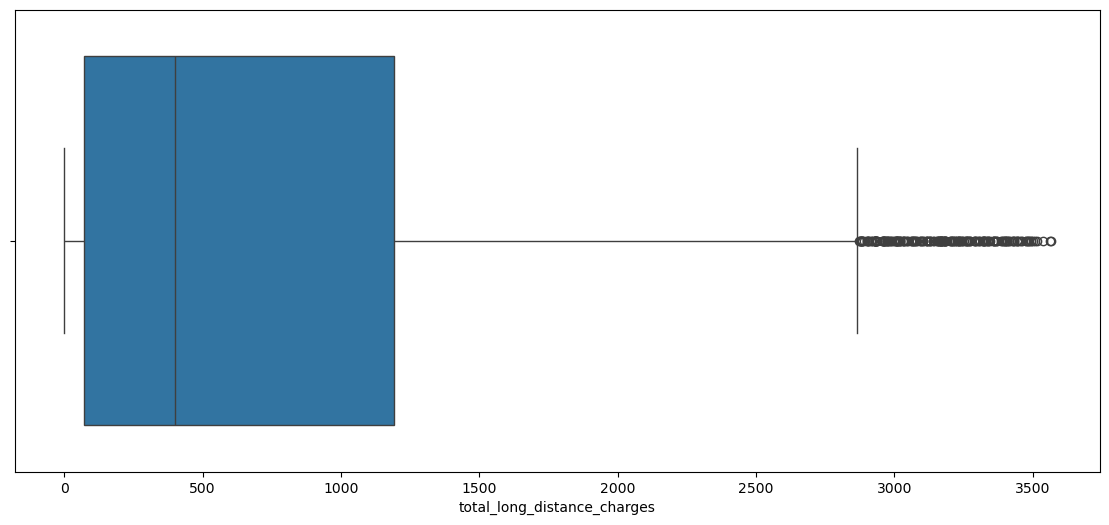

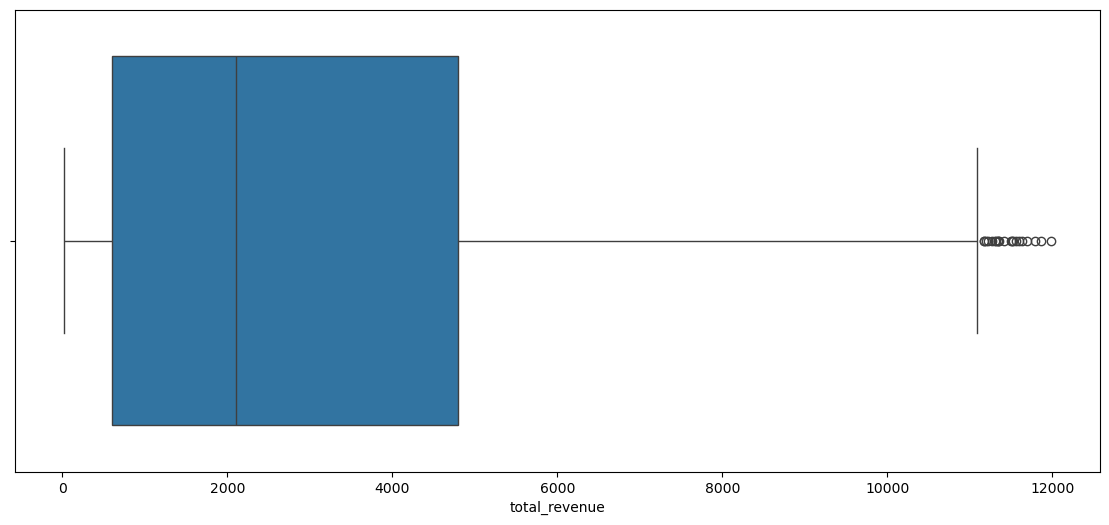

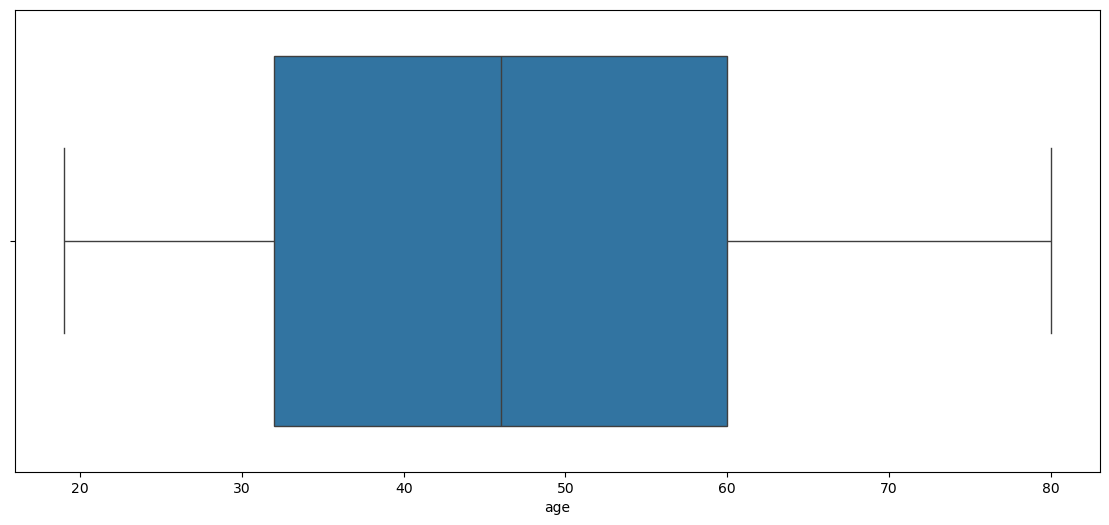

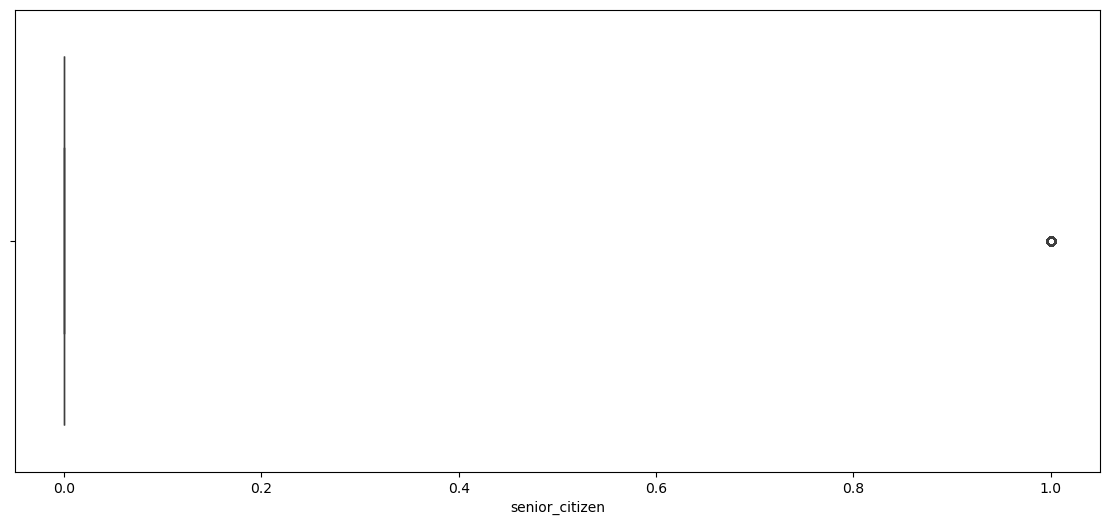

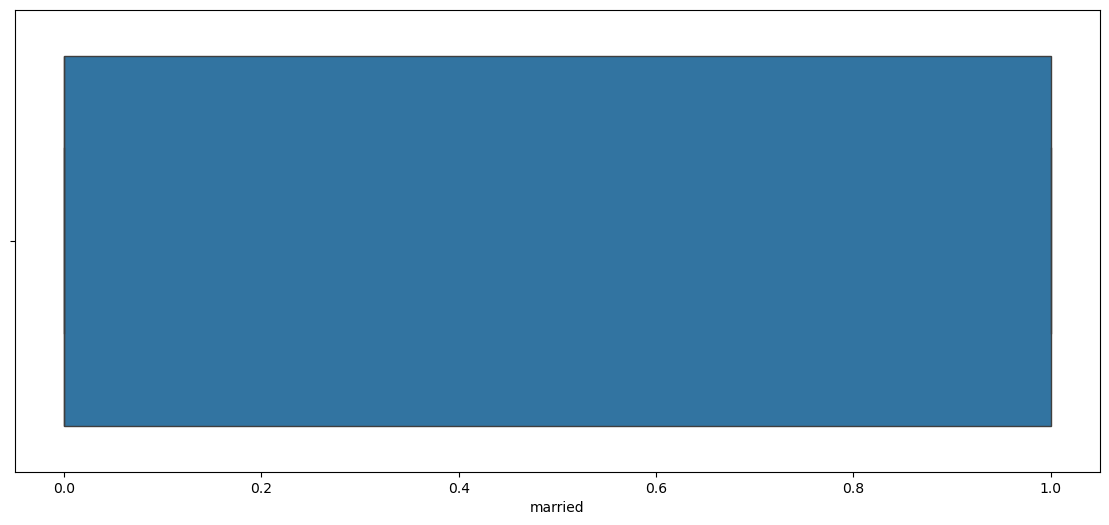

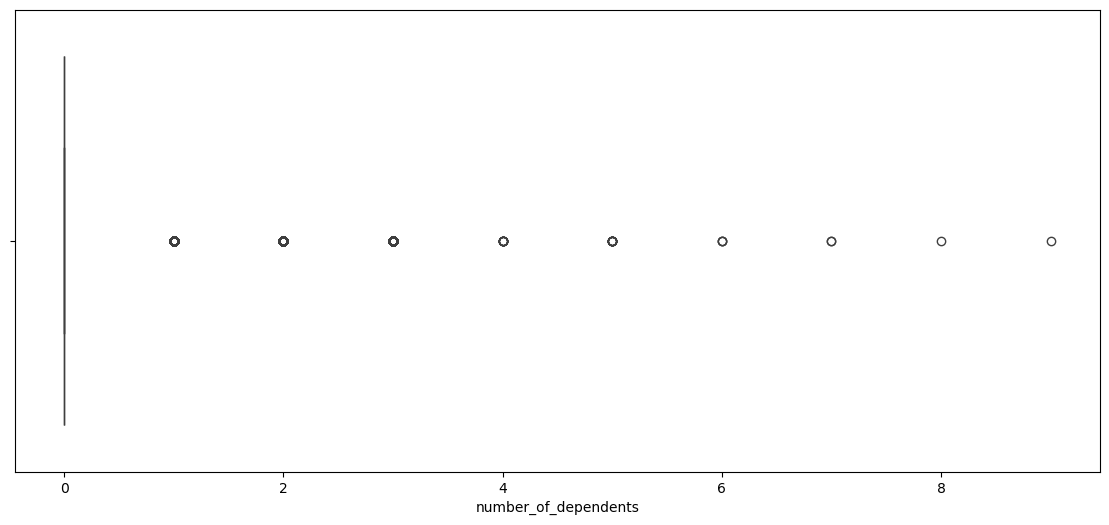

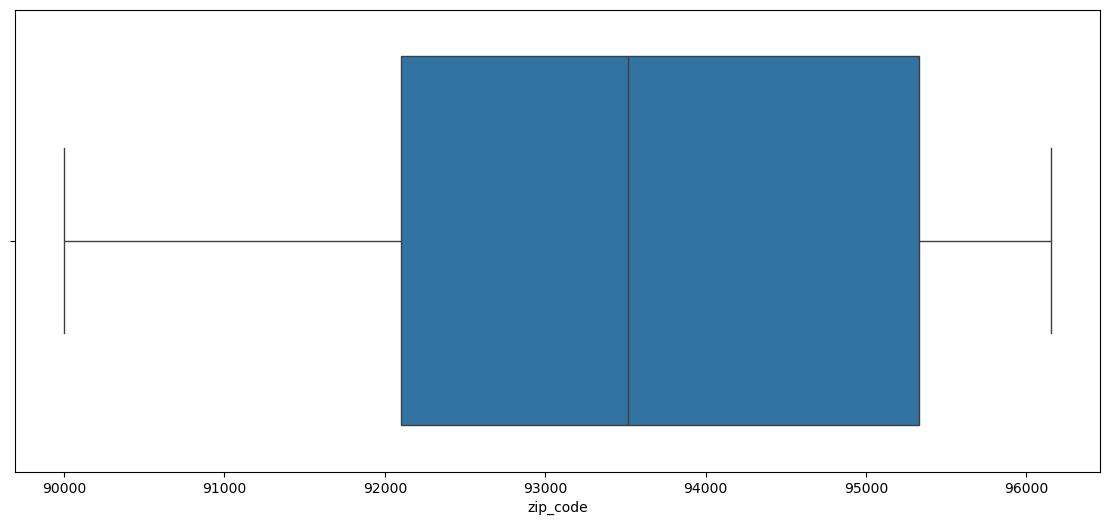

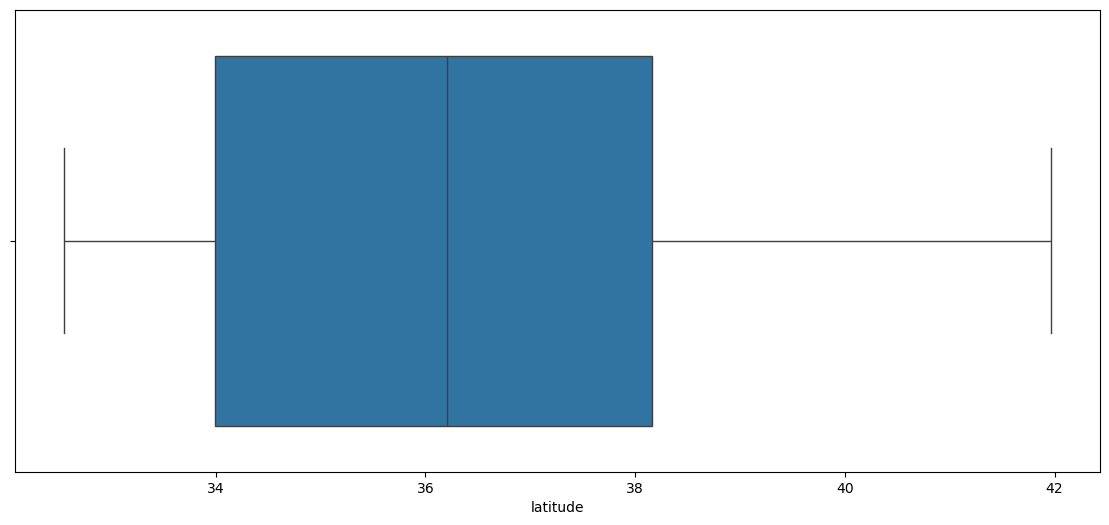

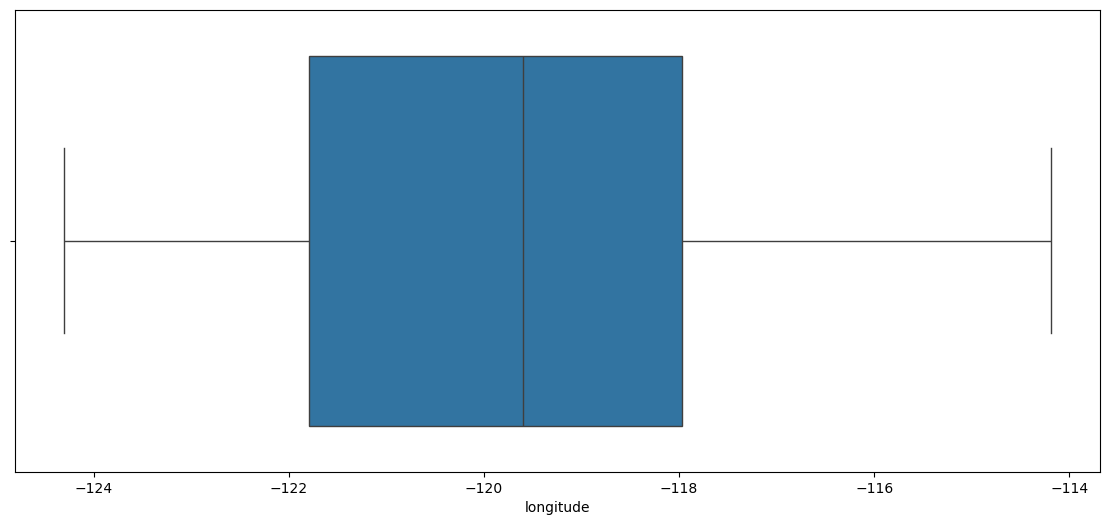

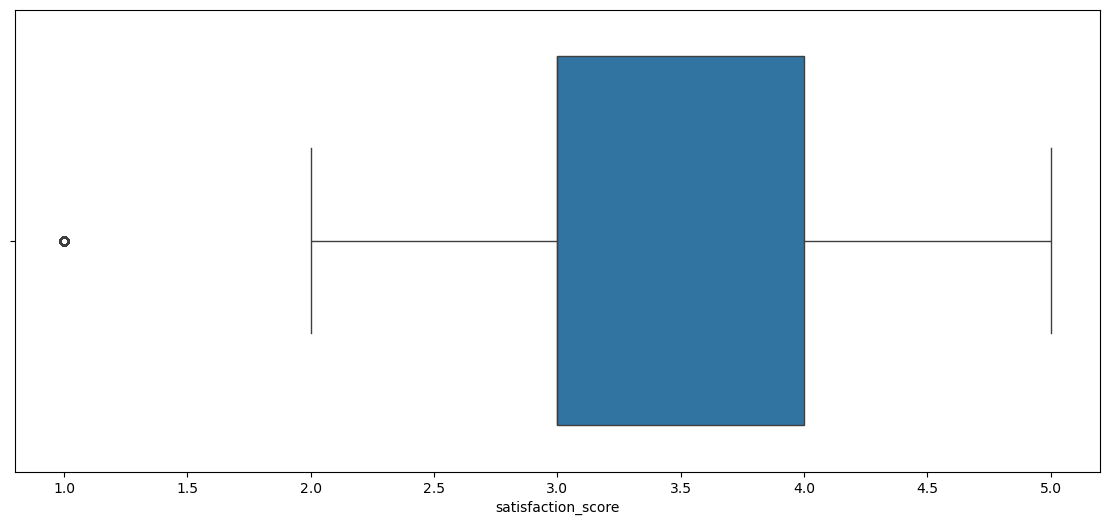

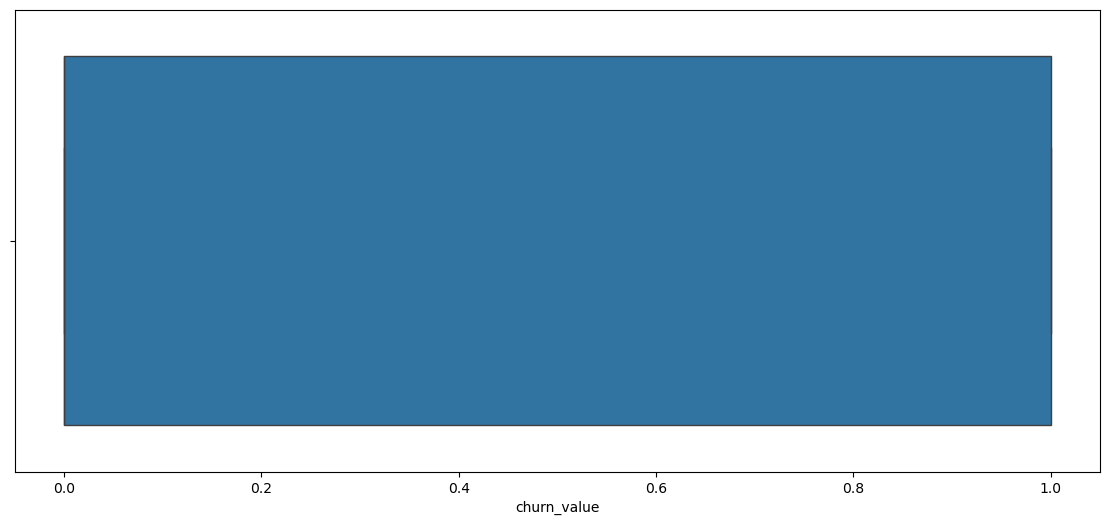

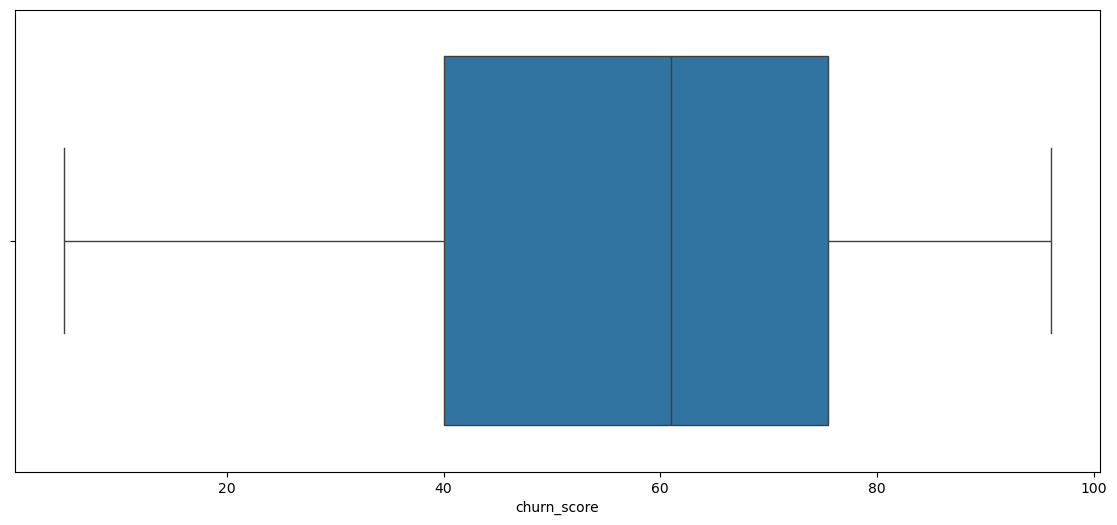

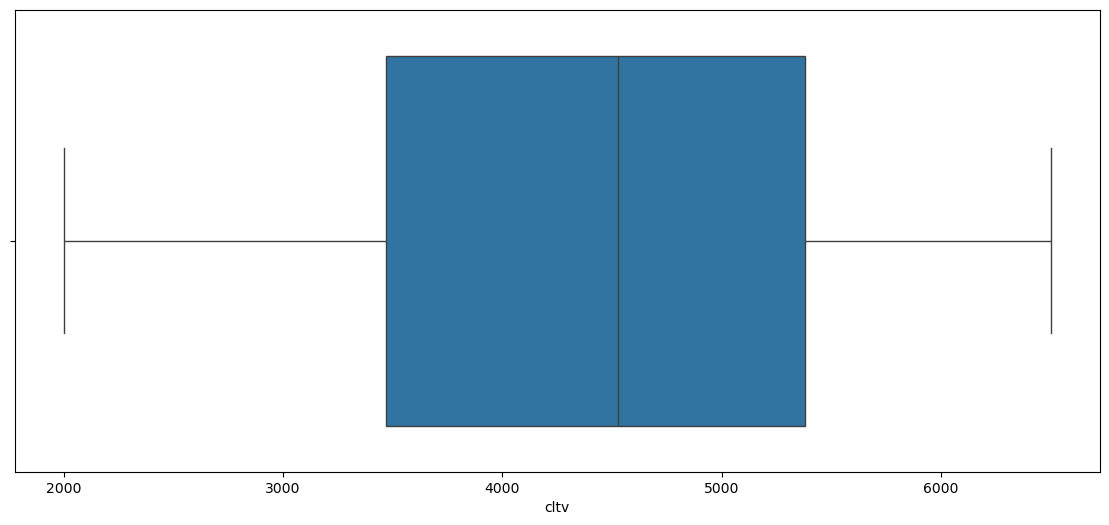

In [25]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6))
    sns.boxplot(ax = ax1, data = df_numerical_variables, x = col)
plt.close()
#Using boxplots to better visualize the outliers

In [26]:
for col in ['number_of_dependents', 'total_extra_data_charges', 'total_refunds']: 
    print(df.select(col).unique())
    print()

shape: (10, 1)
┌──────────────────────┐
│ number_of_dependents │
│ ---                  │
│ i64                  │
╞══════════════════════╡
│ 9                    │
│ 3                    │
│ 6                    │
│ 0                    │
│ 7                    │
│ 1                    │
│ 4                    │
│ 8                    │
│ 2                    │
│ 5                    │
└──────────────────────┘

shape: (16, 1)
┌──────────────────────────┐
│ total_extra_data_charges │
│ ---                      │
│ i64                      │
╞══════════════════════════╡
│ 140                      │
│ 0                        │
│ 30                       │
│ 60                       │
│ 90                       │
│ …                        │
│ 130                      │
│ 20                       │
│ 50                       │
│ 80                       │
│ 110                      │
└──────────────────────────┘

shape: (500, 1)
┌───────────────┐
│ total_refunds │
│ ---           │
│ f64

In [27]:

df.select(
    pl.col('number_of_dependents').value_counts(sort=True)
).unnest('number_of_dependents')


number_of_dependents,count
i64,u32
0,5416
1,553
2,531
3,517
5,10
4,9
6,3
7,2
8,1


In [28]:
df.select(
    pl.col('senior_citizen').value_counts(sort=True)
).unnest('senior_citizen')

senior_citizen,count
i64,u32
0,5901
1,1142


<a class="anchor" id="1st-bullet">

## 1.1Pre-Processing

</a>

In [29]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [30]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (7_043, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 9777-WJJPR  │
│ 4693-VWVBO  │
│ 8597-CWYHH  │
│ 9298-WGMRW  │
│ 1032-MAELW  │
│ …           │
│ 8883-GRDWQ  │
│ 0637-UBJRP  │
│ 5709-LVOEQ  │
│ 2157-MXBJS  │
│ 3050-RLLXC  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ No                │
│ Yes               │
└───────────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer A │
│ Offer D │
│ Offer B │
│ Offer C │
│ Offer E │
│ None    │
└─────────┘

Coluna: phone_service
shape: (2, 1)
┌───────────────┐
│ phone_service │
│ ---           │
│ str           │
╞═══════════════╡
│ Yes           │
│ No            │
└───────────────┘

Coluna: multiple_lines
shape: (2, 1)
┌────────────────┐
│ multiple_lines │
│ ---            │
│ str            │
╞════

C:\Users\gjddi\AppData\Local\Temp\ipykernel_20012\2074748385.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


<a class="anchor" id="1st-bullet">

### 1.1.2 Solve Outliers

</a>

In [31]:
q1, q3 = df.select([
    pl.col("number_of_referrals").quantile(0.25).alias("q1"),
    pl.col("number_of_referrals").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("number_of_referrals")
      .clip(upper_bound=upper_bound)
)

In [32]:
q1, q3 = df.select([
    pl.col("avg_monthly_gb_download").quantile(0.25).alias("q1"),
    pl.col("avg_monthly_gb_download").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("avg_monthly_gb_download")
      .clip(upper_bound=upper_bound)
)

In [33]:
q1, q3 = df.select([
    pl.col("total_long_distance_charges").quantile(0.25).alias("q1"),
    pl.col("total_long_distance_charges").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_long_distance_charges")
      .clip(upper_bound=upper_bound)
)

In [34]:
q1, q3 = df.select([
    pl.col("total_revenue").quantile(0.25).alias("q1"),
    pl.col("total_revenue").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_revenue")
      .clip(upper_bound=upper_bound)
)

In [35]:
q1, q3 = df.select([
    pl.col("satisfaction_score").quantile(0.25).alias("q1"),
    pl.col("satisfaction_score").quantile(0.75).alias("q3")
]).row(0)

lower_bound = q1 - (q3 - q1) * 1.5

df = df.with_columns(
    pl.when(pl.col("satisfaction_score") < lower_bound)
      .then(pl.lit(lower_bound))
      .otherwise(pl.col("satisfaction_score"))
      .alias("satisfaction_score")
)

<a class="anchor" id="1st-bullet">

### 1.1.3 Encoding variables

</a>

In [36]:
valid_vals = ["yes", "no", "male", "female"]

for col in bivalue_columns:
    df = df.with_columns(
        pl.col(col).str.to_lowercase().str.strip_chars()
    )

    mode_val = (
        df
        .filter(pl.col(col).is_in(valid_vals))
        .select(pl.col(col).mode())
        .item()
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(valid_vals))
            .then(pl.col(col))
            .otherwise(pl.lit(mode_val))
            .alias(col)
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(["yes", "male"]))
            .then(1)
          .when(pl.col(col).is_in(["no", "female"]))
            .then(0)
          .otherwise(None)
          .cast(pl.Int32)
          .alias(col)
    )



In [37]:
df

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64
"""8779-QRDMV""",0,0,1,"""None""",0,0.0,0,1,"""DSL""",8,0,0,1,0,0,1,0,0,"""Month-to-Month""",1,"""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,1,78,null,1,0,0,"""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""",3.0,"""Churned""",1,1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,1,8,"""Offer E""",1,48.85,1,1,"""Fiber Optic""",17,0,1,0,0,0,0,0,1,"""Month-to-Month""",1,"""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,0,74,null,1,1,1,"""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,1,"""Q3""",3.0,"""Churned""",1,1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",0,0,18,"""Offer D""",1,11.33,1,1,"""Fiber Optic""",52,0,0,0,0,1,1,1,1,"""Month-to-Month""",1,"""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,1,71,null,1,0,3,"""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,1,"""Q3""",2.0,"""Churned""",1,1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,1,25,"""Offer C""",1,19.76,0,1,"""Fiber Optic""",12,0,1,1,0,1,1,0,1,"""Month-to-Month""",1,"""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,0,78,null,1,1,1,"""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,1,"""Q3""",2.0,"""Churned""",1,1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,1,37,"""Offer C""",1,6.33,1,1,"""Fiber Optic""",14,0,0,0,0,0,0,0,1,"""Month-to-Month""",1,"""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,0,80,null,1,1,1,"""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,1,"""Q3""",2.0,"""Churned""",1,1,67,2793,"""Price""","""Extra data charges""",26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2569-WGERO""",0,0,72,"""None""",1,22.77,0,0,"""None""",0,0,0,0,0,0,0,0,0,"""Two Year""",1,"""Bank Withdrawal""",21.15,1419.4,19.31,0,1639.44,3039.53,0,30,null,0,0,0,"""Landers""",92285,"""34.341737, -116.539416""",34.341737,-116.539416,1,"""Q3""",5.0,"""Stayed""",0,0,45,5306,"""NO_LABEL""","""NO_LABEL""",2182
"""6840-RESVB""",1,1,24,"""Offer C""",1,36.05,1,1,"""Cable""",24,1,0,1,1,1,1,1,1,"""One Year""",1,"""Mailed Check""",84.8,1990.5,48.23,0,865.2,2807.47,1,38,null,0,1,2,"""Adelanto""",92301,"""34.667815, -117.536183""",34.667815,-117.536183,1,"""Q3""",3.0,"""Stayed""",0,0,59,2140,"""NO_LABEL""","""NO_LABEL""",18980
"""2234-XADUH""",1,4,72,"""None""",1,29.66,1,1,"""Fiber Optic""",59,0,1,1,0,1,1,1,1,"""One Year""",1,"""Credit Card""",103.2,7362.9,45.38,0,2135.52,9453.04,0,30,null,0,1,2,"""Amboy""",92304,"""34.559882, -115.637164""",34.559882,-115.637164,1,"""Q3""",4.0,"""Stayed""",0,0,71,5560,"""NO_LABEL""","""NO_LABEL""",42


<a class="anchor" id="1st-bullet">

### 1.1.4 Double check for null values and duplicates after these all transformations

</a>

In [38]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64


In [40]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    if col not in bivalue_columns:
        print(f"Coluna: {col}")
        print(df.select(col).unique())
        print()

Coluna: customer_id
shape: (7_043, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 2460-NGXBJ  │
│ 5108-ADXWO  │
│ 8564-LDKFL  │
│ 8807-ARQET  │
│ 1236-WFCDV  │
│ …           │
│ 0496-AHOOK  │
│ 2265-CYWIV  │
│ 6532-YLWSI  │
│ 0411-EZJZE  │
│ 3173-WSSUE  │
└─────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer E │
│ Offer B │
│ None    │
│ Offer A │
│ Offer C │
│ Offer D │
└─────────┘

Coluna: internet_type
shape: (4, 1)
┌───────────────┐
│ internet_type │
│ ---           │
│ str           │
╞═══════════════╡
│ DSL           │
│ Fiber Optic   │
│ None          │
│ Cable         │
└───────────────┘

Coluna: contract
shape: (3, 1)
┌────────────────┐
│ contract       │
│ ---            │
│ str            │
╞════════════════╡
│ One Year       │
│ Month-to-Month │
│ Two Year       │
└────────────────┘

Coluna: payment_method
shape: (3, 1)
┌─────────────────┐
│ payment_method  │
│ ---             │

C:\Users\gjddi\AppData\Local\Temp\ipykernel_20012\182089192.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


In [41]:
valid_vals = ["Offer A", "Offer B", "Offer C","Offer D", "Offer E"]
col = "offer"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Offer A")
        .then(1)
        .when(pl.col(col) == "Offer B")
        .then(2)
        .when(pl.col(col) == "Offer C")
        .then(3)
        .when(pl.col(col) == "Offer D")
        .then(4)
        .when(pl.col(col) == "Offer E")
        .then(5)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [42]:
valid_vals = ["DSL", "Cable", "Fiber Optic"]
col = "internet_type"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "DSL")
        .then(1)
        .when(pl.col(col) == "Cable")
        .then(2)
        .when(pl.col(col) == "Fiber Optic")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [43]:
valid_vals = ["Month-to-Month", "One Year", "Two Year"]
col = "contract"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Month-to-Month")
        .then(1)
        .when(pl.col(col) == "One Year")
        .then(2)
        .when(pl.col(col) == "Two Year")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [44]:
valid_vals = ["Churned", "Joined", "Stayed"]
col = "customer_status"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Churned")
        .then(0)
        .otherwise(1)
        .cast(pl.Int32)
        .alias(col)
)

In [45]:
col = "churn_category"

df = df.with_columns(
    pl.when(pl.col(col) == "NO_LABEL")
        .then(pl.lit("Other"))
        .otherwise(pl.col(col))
        .alias(col)
)

In [46]:
col = "total_extra_data_charges"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [47]:
col = "total_refunds"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [48]:
col = "number_of_dependents"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [49]:
df = df.to_dummies(columns=["payment_method"])#.drop("payment_method")

In [50]:
df = df.to_dummies(columns=["churn_category"])

In [51]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\gjddi\AppData\Local\Temp\ipykernel_20012\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


<Axes: >

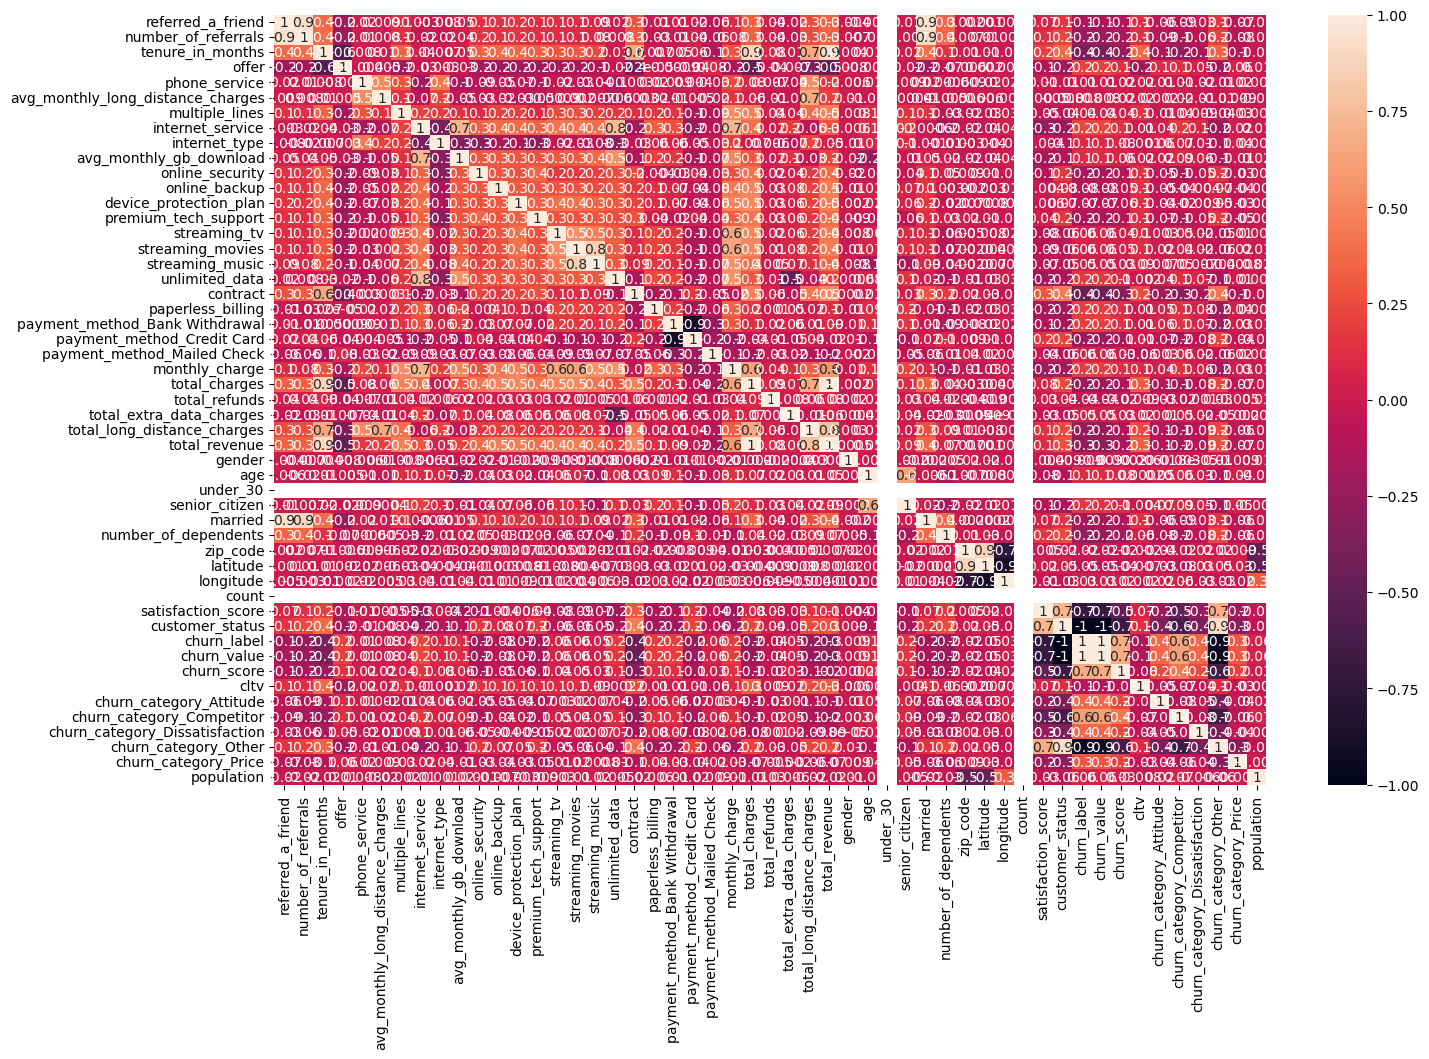

In [52]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [53]:
df_corr

,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,...,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
referred_a_friend,1.000000,0.944762,0.368792,-0.214297,0.015418,0.009166,0.132641,0.002842,-0.008033,0.046473,...,-0.149122,-0.149122,-0.109004,0.121449,-0.061654,-0.091175,-0.031765,0.141103,-0.066083,-0.015737
number_of_referrals,0.944762,1.000000,0.383484,-0.224346,0.014055,0.007954,0.118075,-0.017378,-0.018623,0.037364,...,-0.232719,-0.232719,-0.168780,0.131529,-0.091351,-0.143364,-0.063480,0.217606,-0.083938,-0.021666
tenure_in_months,0.368792,0.383484,1.000000,-0.563891,0.008076,0.013885,0.337896,0.039484,-0.006684,0.053062,...,-0.368708,-0.368708,-0.240337,0.366693,-0.139961,-0.228482,-0.128214,0.343090,-0.099131,-0.018581
offer,-0.214297,-0.224346,-0.563891,1.000000,-0.004426,0.004846,-0.188795,-0.026703,0.002745,-0.025854,...,0.195609,0.195609,0.139737,-0.217382,0.102671,0.118607,0.047049,-0.186001,0.058046,0.010076
phone_service,0.015418,0.014055,0.008076,-0.004426,1.000000,0.512454,0.279690,-0.172209,0.434369,-0.133065,...,0.011942,0.011942,0.024872,0.024125,0.010249,0.009531,-0.015757,-0.011986,0.018115,0.007571
avg_monthly_long_distance_charges,0.009166,0.007954,0.013885,0.004846,0.512454,1.000000,0.143238,-0.073156,0.218707,-0.048985,...,0.008458,0.008458,0.020947,0.023741,0.002409,0.021367,-0.013567,-0.014541,0.008860,-0.016503
multiple_lines,0.132641,0.118075,0.337896,-0.188795,0.279690,0.143238,1.000000,0.210564,0.186845,0.134614,...,0.040102,0.040102,0.042957,0.133481,-0.011781,0.037446,0.008761,-0.038508,0.028658,0.001818
internet_service,0.002842,-0.017378,0.039484,-0.026703,-0.172209,-0.073156,0.210564,1.000000,-0.379945,0.717390,...,0.227890,0.227890,0.145915,0.012012,0.043474,0.170286,0.096224,-0.203938,0.017623,0.013999
internet_type,-0.008033,-0.018623,-0.006684,0.002745,0.434369,0.218707,0.186845,-0.379945,1.000000,-0.314321,...,0.100485,0.100485,0.077214,-0.001160,0.056877,0.067088,0.013128,-0.102577,0.043769,0.001400
avg_monthly_gb_download,0.046473,0.037364,0.053062,-0.025854,-0.133065,-0.048985,0.134614,0.717390,-0.314321,1.000000,...,0.110776,0.110776,0.063561,0.023596,0.023683,0.091582,0.058790,-0.104263,-0.012779,0.024442


<a class="anchor" id="1st-bullet">

# 2. Feature Engineering

### Droping variables based on correlaction, univalue variable and entire null variable

In [54]:
df = df.drop(['customer_id','under_30', 'count', 'quarter', 'lat_long',	'latitude',	'longitude', 'married', 'total_long_distance_charges', 'tenure_in_months', 'city', 'churn_reason','senior_citizen','referred_a_friend','customer_status','zip_code','churn_label'])
#ATENCAO AQUI o zip code saiu porque está como variavel numerica mas temos de usar alguma coisa para a geografia

In [55]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
i64,i32,i32,f64,i32,i32,i32,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,i64,f64,i32,i64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,i64
0,2,0,0.0,0,1,1,8,0,0,1,0,0,1,0,0,1,1,1,0,0,39.65,39.65,0.0,1,59.65,1,78,0,3.0,1,91,5433,0,1,0,0,0,68701
1,5,1,48.85,1,1,3,17,0,1,0,0,0,0,0,1,1,1,0,1,0,80.65,633.3,0.0,0,1024.1,0,74,1,3.0,1,69,5302,0,1,0,0,0,55668
0,4,1,11.33,1,1,3,52,0,0,0,0,1,1,1,1,1,1,1,0,0,95.45,1752.55,1.0,0,1910.88,1,71,1,2.0,1,81,3179,0,1,0,0,0,47534
1,3,1,19.76,0,1,3,12,0,1,1,0,1,1,0,1,1,1,1,0,0,98.5,2514.5,1.0,0,2995.07,0,78,1,2.0,1,88,5337,0,0,1,0,0,27778
1,3,1,6.33,1,1,3,14,0,0,0,0,0,0,0,1,1,1,1,0,0,76.5,2868.15,0.0,0,3102.36,0,80,1,2.0,1,67,2793,0,0,0,0,1,26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,2,1,22.77,0,0,3,0,0,0,0,0,0,0,0,0,3,1,1,0,0,21.15,1419.4,1.0,0,3039.53,0,30,0,5.0,0,45,5306,0,0,0,1,0,2182
1,3,1,36.05,1,1,2,24,1,0,1,1,1,1,1,1,2,1,0,0,1,84.8,1990.5,1.0,0,2807.47,1,38,1,3.0,0,59,2140,0,0,0,1,0,18980
4,2,1,29.66,1,1,3,59,0,1,1,0,1,1,1,1,2,1,0,1,0,103.2,7362.9,1.0,0,9453.04,0,30,1,4.0,0,71,5560,0,0,0,1,0,42


In [56]:
df.shape

(7043, 39)

In [57]:
df = df.drop(['churn_category_Other','churn_category_Competitor','churn_category_Dissatisfaction','churn_category_Attitude','churn_category_Price'])

Variance

In [58]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

def select_features_variance(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    # check which features to use using variance
    for var in numerical_columns:
        apply_variance(X[var], var)

select_features_variance(df)

number_of_referrals:6.556126981242064
offer:1.254578530722217
phone_service:0.08746938260500992
avg_monthly_long_distance_charges:238.6442059340871
multiple_lines:0.24392522373317693
internet_service:0.16974766479920497
internet_type:0.7116562707687265
avg_monthly_gb_download:354.29794942843375
online_security:0.20451833128125257
online_backup:0.22597031752407634
device_protection_plan:0.22566094276312165
premium_tech_support:0.2060204441390741
streaming_tv:0.23665943327079825
streaming_movies:0.23746795307744117
streaming_music:0.22849939167452105
unlimited_data:0.2198530687641667
contract:0.7198985757268057
paperless_billing:0.24152990819613882
payment_method_Bank Withdrawal:0.24700796256920252
payment_method_Credit Card:0.23800335045768867
payment_method_Mailed Check:0.05168336848143002
monthly_charge:905.4109343405124
total_charges:5135755.182022474
total_refunds:0.0689953703873644
total_extra_data_charges:0.09269387226265993
total_revenue:8191031.888531801
gender:0.250012873812907

Decision Tree

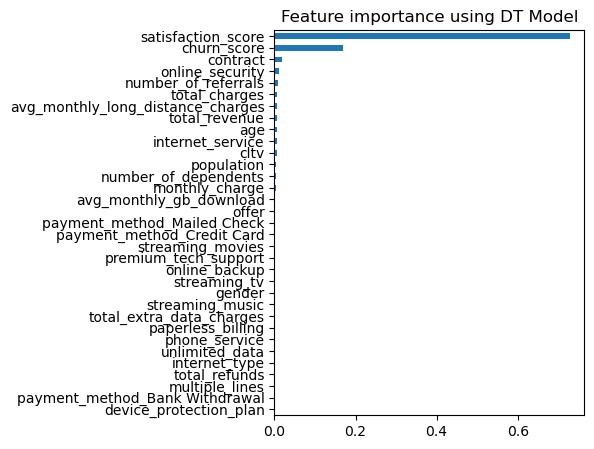

In [59]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

def select_best_features_dt(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis = 1)
    y = df_pd['churn_value'].copy()
    apply_dt(X, y)



select_best_features_dt(df)

In [60]:

df_temp = df.drop(['satisfaction_score','churn_score'])

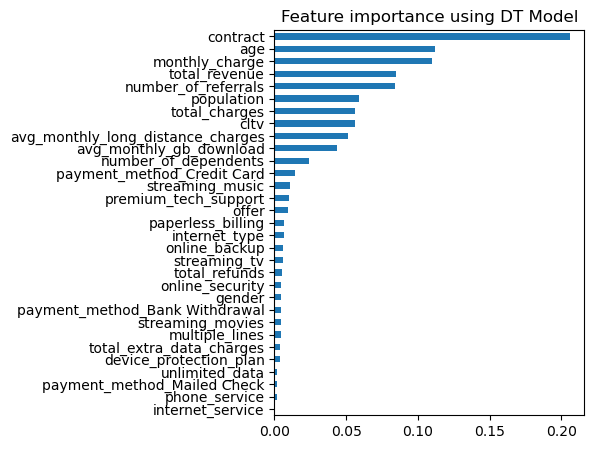

In [61]:
select_best_features_dt(df_temp)

Wrapped Method

In [62]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE 

#def apply_rfe(X_train, y_train):
#    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
#    rfe.fit_transform(X = X_train, y = y_train)
#    selected_features = pd.Series(rfe.support_, index = X_train.columns)
#    print(selected_features)

#def select_best_features(X, y):
#    X_train=X
#    y_train=y
#    numerical_data = X_train.copy()
#    scaler = MinMaxScaler().fit(numerical_data)
#    X_train_scaled = scaler.transform(numerical_data)
#    X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)


#    print('------------------ RFE ----------------------')
#    apply_rfe(X_train, y_train)
#df_pd = df_temp.to_pandas()
#X = df_pd.drop('churn_value', axis = 1)
#y = df_pd['churn_value'].copy()

#select_best_features(X, y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=5)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals     True
contract                True
monthly_charge          True
total_revenue           True
number_of_dependents    True
dtype: bool


In [85]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=7)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals     True
contract                True
monthly_charge          True
total_charges           True
total_revenue           True
age                     True
number_of_dependents    True
dtype: bool


In [ ]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


<a class="anchor" id="1st-bullet">

3.1.5 Chisquare

In [114]:
def apply_chisquare(X, y, var, alpha=0.05):
    # Create contingency table
    dfObserved = pd.crosstab(y, X) 
    # Calculate Chi-square
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # Return True if we should keep it (p-value < alpha), else False
    if p < alpha:
        print(f"{var} KEEP (p-value: {p:.4f})")
        return True
    else:
        print(f"{var} DISCARD (p-value: {p:.4f})")
        return False

def select_best_cat_features(df_pd):
    # Separate Features and Target
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    
    selected_features = []
    
    # Iterate over ALL columns in X (since they are already encoded)
    for var in X.columns:
        # Optional: Skip columns that are continuous numbers (like 'TotalCharges' or 'Tenure')
        # if X[var].nunique() > 20: 
        #     continue
            
        if apply_chisquare(X[var], y, var):
            selected_features.append(var)
            
    return selected_features
    
    for var in X_train_cat:
        # If the function returns True, add to our list
        if apply_chisquare(X_train_cat[var], y, var):
            selected_features.append(var)
            
    return selected_features

# Now you can store the best features in a variable
best_features = select_best_cat_features(df_pd)
print("\nFinal Selected Features:", best_features)

number_of_referrals KEEP (p-value: 0.0000)
offer KEEP (p-value: 0.0000)
phone_service DISCARD (p-value: 0.3388)
avg_monthly_long_distance_charges DISCARD (p-value: 0.3886)
multiple_lines KEEP (p-value: 0.0008)
internet_service KEEP (p-value: 0.0000)
internet_type KEEP (p-value: 0.0000)
avg_monthly_gb_download KEEP (p-value: 0.0000)
online_security KEEP (p-value: 0.0000)
online_backup KEEP (p-value: 0.0000)
device_protection_plan KEEP (p-value: 0.0000)
premium_tech_support KEEP (p-value: 0.0000)
streaming_tv KEEP (p-value: 0.0000)
streaming_movies KEEP (p-value: 0.0000)
streaming_music KEEP (p-value: 0.0001)
unlimited_data KEEP (p-value: 0.0000)
contract KEEP (p-value: 0.0000)
paperless_billing KEEP (p-value: 0.0000)
payment_method_Bank Withdrawal KEEP (p-value: 0.0000)
payment_method_Credit Card KEEP (p-value: 0.0000)
payment_method_Mailed Check KEEP (p-value: 0.0000)
monthly_charge KEEP (p-value: 0.0000)
total_charges DISCARD (p-value: 0.5842)
total_refunds KEEP (p-value: 0.0011)
tota

### Apply Scaling

In [64]:
df_scaled = df.with_columns([
    ((pl.col(c) - df.select(pl.col(c).min()).item()) /
     (df.select(pl.col(c).max()).item() - df.select(pl.col(c).min()).item()))
    .alias(f"{c}")
    for c in df.columns
])

In [65]:
df.schema

Schema([('number_of_referrals', Int64),
        ('offer', Int32),
        ('phone_service', Int32),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', Int32),
        ('internet_service', Int32),
        ('internet_type', Int32),
        ('avg_monthly_gb_download', Int64),
        ('online_security', Int32),
        ('online_backup', Int32),
        ('device_protection_plan', Int32),
        ('premium_tech_support', Int32),
        ('streaming_tv', Int32),
        ('streaming_movies', Int32),
        ('streaming_music', Int32),
        ('unlimited_data', Int32),
        ('contract', Int32),
        ('paperless_billing', Int32),
        ('payment_method_Bank Withdrawal', UInt8),
        ('payment_method_Credit Card', UInt8),
        ('payment_method_Mailed Check', UInt8),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_revenue', Float6

In [66]:
df_scaled

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,population
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.126984,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.212935,0.002406,0.0,1.0,0.003457,1.0,0.967213,0.0,0.428571,1.0,0.945055,0.762731,0.652488
0.142857,1.0,1.0,0.977195,1.0,1.0,1.0,0.269841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.620896,0.070909,0.0,0.0,0.090542,0.0,0.901639,1.0,0.428571,1.0,0.703297,0.7336,0.528687
0.0,0.75,1.0,0.226645,1.0,1.0,1.0,0.825397,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.768159,0.200063,1.0,0.0,0.170614,1.0,0.852459,1.0,0.142857,1.0,0.835165,0.261508,0.451422
0.142857,0.5,1.0,0.395279,0.0,1.0,1.0,0.190476,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.798507,0.287988,1.0,0.0,0.26851,0.0,0.967213,1.0,0.142857,1.0,0.912088,0.741383,0.263759
0.142857,0.5,1.0,0.126625,1.0,1.0,1.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.579602,0.328796,0.0,0.0,0.278198,0.0,1.0,1.0,0.142857,1.0,0.681319,0.175673,0.249387
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.25,1.0,0.455491,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.028856,0.16162,1.0,0.0,0.272525,0.0,0.180328,0.0,1.0,0.0,0.43956,0.73449,0.020622
0.142857,0.5,1.0,0.721144,1.0,1.0,0.5,0.380952,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.662189,0.227521,1.0,0.0,0.251571,1.0,0.311475,1.0,0.428571,0.0,0.593407,0.030465,0.180187
0.571429,0.25,1.0,0.593319,1.0,1.0,1.0,0.936508,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,0.0,0.845274,0.847461,1.0,0.0,0.851631,0.0,0.180328,1.0,0.714286,0.0,0.725275,0.790972,0.000294


In [67]:
df_scaled.columns

['number_of_referrals',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method_Bank Withdrawal',
 'payment_method_Credit Card',
 'payment_method_Mailed Check',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_revenue',
 'gender',
 'age',
 'number_of_dependents',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

Features to keep

In [68]:
features_to_keep = [
    #"customer_id",
#"referred_a_friend",
"number_of_referrals",
#"tenure_in_months",
#"offer",
#"phone_service",
#"avg_monthly_long_distance_charges",
#"multiple_lines",
#"internet_service",
#"internet_type",
#"avg_monthly_gb_download",
#"online_security",
#"online_backup",
#"device_protection_plan",
#"premium_tech_support",
#"streaming_tv",
#"streaming_movies",
#"streaming_music",
#"unlimited_data",
"contract",
#"paperless_billing",
#"payment_method",
"monthly_charge",
#"total_charges",
#"total_refunds",
#"total_extra_data_charges",
#"total_long_distance_charges",
"total_revenue",
#"gender",
#"age",
#"under_30",
#"senior_citizen",
#"married",
"number_of_dependents",
#"city",
#"zip_code",
#"lat_long",
#"latitude",
#"longitude",
#"count",
#"quarter",
#"satisfaction_score",
#"customer_status",
#"churn_label",                                
#"churn_value",                                
#"churn_score",
#"cltv",
#"churn_category",
#"churn_reason",
#"population"
]


In [120]:
keep_data = df_scaled[features_to_keep].clone()
all_data = df_temp.clone

In [116]:
keep_data

number_of_referrals,contract,monthly_charge,total_revenue,number_of_dependents
f64,f64,f64,f64,f64
0.0,0.0,0.212935,0.003457,0.0
0.142857,0.0,0.620896,0.090542,1.0
0.0,0.0,0.768159,0.170614,1.0
0.142857,0.0,0.798507,0.26851,1.0
0.142857,0.0,0.579602,0.278198,1.0
…,…,…,…,…
0.0,1.0,0.028856,0.272525,0.0
0.142857,0.5,0.662189,0.251571,1.0
0.571429,0.5,0.845274,0.851631,1.0


In [117]:
all_data

<bound method DataFrame.clone of shape: (7_043, 32)
┌─────────────┬───────┬─────────────┬────────────┬───┬────────────┬────────────┬──────┬────────────┐
│ number_of_r ┆ offer ┆ phone_servi ┆ avg_monthl ┆ … ┆ number_of_ ┆ churn_valu ┆ cltv ┆ population │
│ eferrals    ┆ ---   ┆ ce          ┆ y_long_dis ┆   ┆ dependents ┆ e          ┆ ---  ┆ ---        │
│ ---         ┆ i32   ┆ ---         ┆ tance_char ┆   ┆ ---        ┆ ---        ┆ i64  ┆ i64        │
│ i64         ┆       ┆ i32         ┆ …          ┆   ┆ i64        ┆ i64        ┆      ┆            │
│             ┆       ┆             ┆ ---        ┆   ┆            ┆            ┆      ┆            │
│             ┆       ┆             ┆ f64        ┆   ┆            ┆            ┆      ┆            │
╞═════════════╪═══════╪═════════════╪════════════╪═══╪════════════╪════════════╪══════╪════════════╡
│ 0           ┆ 2     ┆ 0           ┆ 0.0        ┆ … ┆ 0          ┆ 1          ┆ 5433 ┆ 68701      │
│ 1           ┆ 5     ┆ 1           ┆ 4

Model

In [72]:
def score(y_val, y_pred):
    micro_f1 = f1_score(y_val, y_pred, average='micro')
    print('Custom Micro F1-score:', micro_f1)
    print('\nClassification Report:')
    print(classification_report(y_true=y_val, y_pred=y_pred))


def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
    X = all_data.drop("churn_value", axis=1).clone()
    y = all_data["churn_value"].clone()

    X = encode_data(X)
    
    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val


def show_results(df, data, *args):
    count = 0
    
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # Create the formatted string for results
        train_result = f"{avg_train} +/- {std_train}"
        val_result = f"{avg_val} +/- {std_val}"
        
        # Assign values to the DataFrame
        df.iloc[count] = [train_result, val_result]
        count += 1

    return df

In [73]:
y.value_counts(normalize=True)

churn_value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier    
from sklearn.neural_network import MLPClassifier   
from sklearn.svm import SVC                       
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)
model_SVM = SVC(random_state=99)
model_RF= RandomForestClassifier(random_state=99)
model_LR= LogisticRegression(C=100, penalty="l2", solver="lbfgs",random_state=42)

In [87]:

def show_results(df, data, *args):
    count = 0
    # Ensure the DataFrame structure matches the required format
    expected_columns = [
        "Train F1", "Validation F1", "Train Precision", "Validation Precision",
        "Train Recall", "Validation Recall", "Train Accuracy", "Validation Accuracy"
    ]
    if list(df.columns) != expected_columns:
        raise ValueError(f"DataFrame must have the following columns: {expected_columns}")
    
    for arg in args:
        avg_train_metrics, avg_val_metrics = select_best_models(data, arg)
        
        # Fill the DataFrame for the current model
        df.iloc[count] = [
            f"{avg_train_metrics[0][0]} +/- {avg_train_metrics[0][1]}",  # Train F1
            f"{avg_val_metrics[0][0]} +/- {avg_val_metrics[0][1]}",      # Validation F1
            f"{avg_train_metrics[1][0]} +/- {avg_train_metrics[1][1]}",  # Train Precision
            f"{avg_val_metrics[1][0]} +/- {avg_val_metrics[1][1]}",      # Validation Precision
            f"{avg_train_metrics[2][0]} +/- {avg_train_metrics[2][1]}",  # Train Recall
            f"{avg_val_metrics[2][0]} +/- {avg_val_metrics[2][1]}",      # Validation Recall
            f"{avg_train_metrics[3][0]} +/- {avg_train_metrics[3][1]}",  # Train Accuracy
            f"{avg_val_metrics[3][0]} +/- {avg_val_metrics[3][1]}"       # Validation Accuracy
        ]
        count += 1

    return df


# Define a custom score function
def score(y_val, y_pred):
    micro_f1 = f1_score(y_val, y_pred, average='micro')
    print('Custom Micro F1-score:', micro_f1)
    print('\nClassification Report:')
    print(classification_report(y_true=y_val, y_pred=y_pred))

def select_best_models(data, model):
    skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    X = all_data.drop("churn_value", axis=1).clone()
    y = all_data["churn_value"].clone()

    X = encode_data(X)
    
    train_metrics, val_metrics = [], []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Scale the data
        scaler = MinMaxScaler().fit(X_train_resampled)
        X_train_resampled = scaler.transform(X_train_resampled)
        X_val = scaler.transform(X_val)

        # Train the model
        model.fit(X_train_resampled, y_train_resampled)

        # Predictions
        y_train_pred = model.predict(X_train_resampled)
        y_val_pred = model.predict(X_val)

        # Calculate metrics
        train_metrics.append([
            f1_score(y_train_resampled, y_train_pred),
            precision_score(y_train_resampled, y_train_pred),
            recall_score(y_train_resampled, y_train_pred),
            accuracy_score(y_train_resampled, y_train_pred),
        ])
        val_metrics.append([
            f1_score(y_val, y_val_pred),
            precision_score(y_val, y_val_pred),
            recall_score(y_val, y_val_pred),
            accuracy_score(y_val, y_val_pred),
        ])

    avg_train_metrics = [(round(np.mean(metric), 3), round(np.std(metric), 2)) for metric in zip(*train_metrics)]
    avg_val_metrics = [(round(np.mean(metric), 3), round(np.std(metric), 2)) for metric in zip(*val_metrics)]

    return avg_train_metrics, avg_val_metrics

In [94]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = all_data.drop("churn_value", axis=1).clone()
    y = all_data["churn_value"].clone()


    train_results,val_results = [],[]
    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        scaler = MinMaxScaler().fit(X_train_resampled)
        X_train_resampled = scaler.transform(X_train_resampled)
        X_val = scaler.transform(X_val)

        # apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)

        train_results.append((y_train, predictions_train))
        val_results.append((y_val, predictions_val))
    return train_results, val_results

def apply_score(train_results, val_results, score):
    score_train, score_val = [],[]

    for reference, prediction in train_results:
        score_train.append(score(reference, prediction))

    for reference, prediction in val_results:
        score_val.append(score(reference, prediction))
    # print(score_train)
    # print(score_val)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),4)
    std_val = round(np.std(score_val),4)

    return avg_train, std_train, avg_val, std_val

def show_results(df, data, score,*args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        train_results, val_results  = select_best_models(data, arg)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, score)#)#)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [95]:
df_all = pd.DataFrame(
       columns=[
        "Train F1","Validation F1", "Train Precision","Validation Precision", "Train Recall","Validation Recall", "Train Accuracy","Validation Accuracy"
    ],
    index = ['KNN','DT','NN','SVM','RF','LR',])

In [96]:
df_results = show_results(
    df_all,
    all_data,
    model_KNN,
    model_DT,
    model_NN,
    model_SVM,
    model_RF,
    model_LR,
    
)

df_results

AttributeError: 'function' object has no attribute 'drop'